# `Comprehensive Data Analysis`


### ~~Surface~~ Dataset Overview

This project leverages **three official aggregated datasets released by UIDAI under the UIDAI Data Hackathon**. The data is **privacy-preserving**, **fully anonymized**, and contains **no personally identifiable information (PII)**. It supports temporal, geographic, and age-wise analysis of Aadhaar enrolment and update patterns across India.

---

## 1. Aadhaar Enrolment Dataset

**Purpose**: Analyze new Aadhaar registrations to understand enrolment growth, coverage, and regional disparities.

**Key Attributes**:
- `date` (DD-MM-YYYY)
- `state`, `district`, `pincode`
- `age_0_5`, `age_5_17`, `age_18_greater`

**Applications**:
- Enrolment momentum and penetration analysis  
- Regional inequality assessment  
- Child enrolment behavior and seasonal trends  

---

## 2. Aadhaar Demographic Update Dataset

**Purpose**: Study demographic corrections to assess data quality, mobility, and operational load.

**Key Attributes**:
- `date`, `state`, `district`, `pincode`
- `demo_age_5_17`, `demo_age_17_`

**Applications**:
- Identifying high-update and migration-prone regions  
- Measuring demographic data instability  

---

## 3. Aadhaar Biometric Update Dataset

**Purpose**: Analyze biometric revalidation trends and lifecycle compliance.

**Key Attributes**:
- `date`, `state`, `district`, `pincode`
- `bio_age_5_17`, `bio_age_17_`

**Applications**:
- Evaluating adolescent biometric transition compliance  
- Detecting biometric update stress regions  

---

## Common Data Characteristics

- **Source**: UIDAI Data Hackathon  
- **Type**: Aggregated administrative counts  
- **Granularity**: National → State → District → PIN Code  
- **Period**: Jan 2023 – Dec 2025  
- **Frequency**: Monthly  
- **Privacy**: Fully anonymized  

---

## Data Use Statement

Data is used strictly for **research and governance-focused analysis** in accordance with UIDAI Data Hackathon guidelines, ensuring ethical use and privacy compliance.


## 1. INITIAL SETUP

### 1.1 Neccessary Imports

In [1]:
# ----statistic mesasures----
import pandas as pd
import numpy as np

# ----preprocessing & feature engineering----
from datetime import datetime

# ----ignore warnings----
import warnings
warnings.filterwarnings('ignore')

# ----Visualization Settings----
import matplotlib.pyplot as plt
import seaborn as sns

## 2. IMPORT DATA

In [2]:
# Load enrolment datasets
files = [
    "api_data_aadhar_enrolment_0_500000.csv",
    "api_data_aadhar_enrolment_500000_1000000.csv", 
    "api_data_aadhar_enrolment_1000000_1006029.csv"
]

# Read and combine
enrolment_dfs = [pd.read_csv(f) for f in files]
enrolment_df = pd.concat(enrolment_dfs, ignore_index=True)

print(f"Enrolment dataset loaded: {enrolment_df.shape[0]:,} rows × {enrolment_df.shape[1]} columns")
print(f"Initial date range: {enrolment_df['date'].min()} to {enrolment_df['date'].max()}")

Enrolment dataset loaded: 1,006,029 rows × 7 columns
Initial date range: 01-04-2025 to 31-12-2025


In [3]:
# Load enrolment datasets
files = [
    "api_data_aadhar_demographic_0_500000.csv",
    "api_data_aadhar_demographic_500000_1000000.csv", 
    "api_data_aadhar_demographic_1000000_1500000.csv",
    "api_data_aadhar_demographic_1500000_2000000.csv",
    "api_data_aadhar_demographic_2000000_2071700.csv"
]

# Read and combine
demo_update_dfs = [pd.read_csv(f) for f in files]
demo_update_df = pd.concat(demo_update_dfs, ignore_index=True)

print(f"Enrolment dataset loaded: {demo_update_df.shape[0]:,} rows × {demo_update_df.shape[1]} columns")
print(f"Initial date range: {demo_update_df['date'].min()} to {demo_update_df['date'].max()}")

Enrolment dataset loaded: 2,071,700 rows × 6 columns
Initial date range: 01-03-2025 to 31-10-2025


In [4]:
# Load enrolment datasets
files = [
    "api_data_aadhar_biometric_0_500000.csv",
    "api_data_aadhar_biometric_500000_1000000.csv", 
    "api_data_aadhar_biometric_1000000_1500000.csv",
    "api_data_aadhar_biometric_1500000_1861108.csv"
]

# Read and combine
bio_update_dfs = [pd.read_csv(f) for f in files]
bio_update_df = pd.concat(bio_update_dfs, ignore_index=True)

print(f"Enrolment dataset loaded: {bio_update_df.shape[0]:,} rows × {bio_update_df.shape[1]} columns")
print(f"Initial date range: {bio_update_df['date'].min()} to {bio_update_df['date'].max()}")

Enrolment dataset loaded: 1,861,108 rows × 6 columns
Initial date range: 01-03-2025 to 31-10-2025


In [5]:
# !pip install xgboost
# !pip install lightgbm

## 3. Dataset Harmonization & Integration

In [6]:
enrolment_df

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21
...,...,...,...,...,...,...,...
1006024,31-12-2025,West Bengal,West Midnapore,721149,2,0,0
1006025,31-12-2025,West Bengal,West Midnapore,721150,2,2,0
1006026,31-12-2025,West Bengal,West Midnapore,721305,0,1,0
1006027,31-12-2025,West Bengal,West Midnapore,721504,1,0,0


In [7]:
print("🔧 STEP 1: DATASET HARMONIZATION")
print("="*80)

print(f"Enrolment dataset columns: {enrolment_df.columns.tolist()}")
print(f"Demographic update dataset columns: {demo_update_df.columns.tolist()}")
print(f"Biometric update dataset columns: {bio_update_df.columns.tolist()}")

print(f"\nEnrolment dataset shape: {enrolment_df.shape}")
print(f"Demographic update dataset shape: {demo_update_df.shape}")
print(f"Biometric update dataset shape: {bio_update_df.shape}")

# Convert date columns
print("\n📅 Converting date columns...")
enrolment_df['date'] = pd.to_datetime(enrolment_df['date'], format='%d-%m-%Y')
demo_update_df['date'] = pd.to_datetime(demo_update_df['date'], format='%d-%m-%Y')
bio_update_df['date'] = pd.to_datetime(bio_update_df['date'], format='%d-%m-%Y')

# Check if year_month already exists and create if needed
print("\n🔄 Creating year_month period column...")
for df, name in [(enrolment_df, 'Enrolment'), (demo_update_df, 'Demographic'), (bio_update_df, 'Biometric')]:
    if 'year_month' not in df.columns:
        df['year_month'] = df['date'].dt.to_period('M')
        print(f"Created year_month for {name} dataset")
    else:
        # Convert string to period if needed
        if df['year_month'].dtype == 'object':
            df['year_month'] = pd.to_datetime(df['year_month']).dt.to_period('M')
        print(f"Converted year_month for {name} dataset")

# DERIVED METRICS CREATION
print("\n📈 DERIVED METRICS CREATION")
print("-"*40)

# 1. Enrolment dataset metrics
enrolment_df['enrol_total'] = enrolment_df['age_0_5'] + enrolment_df['age_5_17'] + enrolment_df['age_18_greater']
print(f"Created enrol_total for Enrolment dataset")

# 2. Demographic update dataset metrics
demo_update_df['demo_total'] = demo_update_df['demo_age_5_17'] + demo_update_df['demo_age_17_']
print(f"Created demo_total for Demographic dataset")

# 3. Biometric update dataset metrics
bio_update_df['bio_total'] = bio_update_df['bio_age_5_17'] + bio_update_df['bio_age_17_']
print(f"Created bio_total for Biometric dataset")

# DATASET INTEGRATION
print("\n🔗 DATASET INTEGRATION: Merging all datasets")
print("-"*40)

# Group by month and geography for each dataset
print("\nGrouping data by month and geography...")

# Enrolment grouping
enrolment_grouped = enrolment_df.groupby(['year_month', 'state', 'district', 'pincode']).agg({
    'age_0_5': 'sum',
    'age_5_17': 'sum',
    'age_18_greater': 'sum',
    'enrol_total': 'sum'
}).reset_index()
print(f"Enrolment grouped shape: {enrolment_grouped.shape}")

# Demographic update grouping
demo_grouped = demo_update_df.groupby(['year_month', 'state', 'district', 'pincode']).agg({
    'demo_age_5_17': 'sum',
    'demo_age_17_': 'sum',
    'demo_total': 'sum'
}).reset_index()
print(f"Demographic grouped shape: {demo_grouped.shape}")

# Biometric update grouping
bio_grouped = bio_update_df.groupby(['year_month', 'state', 'district', 'pincode']).agg({
    'bio_age_5_17': 'sum',
    'bio_age_17_': 'sum',
    'bio_total': 'sum'
}).reset_index()
print(f"Biometric grouped shape: {bio_grouped.shape}")

# Merge datasets
print("\nMerging datasets...")
merged_df = pd.merge(enrolment_grouped, demo_grouped, 
                     on=['year_month', 'state', 'district', 'pincode'], 
                     how='outer')

merged_df = pd.merge(merged_df, bio_grouped,
                     on=['year_month', 'state', 'district', 'pincode'],
                     how='outer')

print(f"Merged dataset shape: {merged_df.shape}")

# Fill NaN values with 0 for numeric columns
numeric_cols = merged_df.select_dtypes(include=[np.number]).columns
merged_df[numeric_cols] = merged_df[numeric_cols].fillna(0)

# Create composite metrics
print("\nCreating composite metrics...")

# Total activity across all services
merged_df['total_activity'] = merged_df['enrol_total'] + merged_df['demo_total'] + merged_df['bio_total']

# Calculate percentages
merged_df['pct_enrol'] = (merged_df['enrol_total'] / merged_df['total_activity'].replace(0, 1)) * 100
merged_df['pct_demo'] = (merged_df['demo_total'] / merged_df['total_activity'].replace(0, 1)) * 100
merged_df['pct_bio'] = (merged_df['bio_total'] / merged_df['total_activity'].replace(0, 1)) * 100

# Update intensity (updates relative to enrolment)
merged_df['update_intensity'] = (merged_df['demo_total'] + merged_df['bio_total']) / merged_df['enrol_total'].replace(0, 1)

# Age group analysis for enrolment
merged_df['pct_age_0_5'] = (merged_df['age_0_5'] / merged_df['enrol_total'].replace(0, 1)) * 100
merged_df['pct_age_5_17'] = (merged_df['age_5_17'] / merged_df['enrol_total'].replace(0, 1)) * 100
merged_df['pct_age_18_greater'] = (merged_df['age_18_greater'] / merged_df['enrol_total'].replace(0, 1)) * 100

# For biometric updates, calculate child vs adult ratio
merged_df['bio_child_pct'] = (merged_df['bio_age_5_17'] / merged_df['bio_total'].replace(0, 1)) * 100
merged_df['bio_adult_pct'] = (merged_df['bio_age_17_'] / merged_df['bio_total'].replace(0, 1)) * 100

# For demographic updates
merged_df['demo_child_pct'] = (merged_df['demo_age_5_17'] / merged_df['demo_total'].replace(0, 1)) * 100
merged_df['demo_adult_pct'] = (merged_df['demo_age_17_'] / merged_df['demo_total'].replace(0, 1)) * 100

# Create derived temporal features
merged_df['year'] = merged_df['year_month'].dt.year
merged_df['month'] = merged_df['year_month'].dt.month
merged_df['quarter'] = ((merged_df['month'] - 1) // 3) + 1

# Display final columns
print("\n📊 FINAL INTEGRATED DATASET INFO:")
print("-"*40)
print(f"Dataset shape: {merged_df.shape}")
print(f"\nColumn categories:")
print(f"Date/Time columns: {[col for col in merged_df.columns if 'year' in col or 'month' in col or 'quarter' in col]}")
print(f"Geographic columns: {[col for col in merged_df.columns if col in ['state', 'district', 'pincode']]}")
print(f"Enrolment columns: {[col for col in merged_df.columns if 'age_' in col or 'enrol' in col]}")
print(f"Demographic columns: {[col for col in merged_df.columns if 'demo' in col]}")
print(f"Biometric columns: {[col for col in merged_df.columns if 'bio' in col]}")
print(f"Percentage columns: {[col for col in merged_df.columns if 'pct_' in col]}")

print(f"\n✅ Time period: {merged_df['year_month'].min()} to {merged_df['year_month'].max()}")
print(f"✅ Unique states: {merged_df['state'].nunique()}")
print(f"✅ Unique districts: {merged_df['district'].nunique()}")
print(f"✅ Unique pincodes: {merged_df['pincode'].nunique()}")
print(f"✅ Total enrolment: {merged_df['enrol_total'].sum():,}")
print(f"✅ Total demographic updates: {merged_df['demo_total'].sum():,}")
print(f"✅ Total biometric updates: {merged_df['bio_total'].sum():,}")
print(f"✅ Total activity: {merged_df['total_activity'].sum():,}")

# Save harmonized dataset
# merged_df.to_csv('harmonized_aadhaar_dataset.csv', index=False)
# print("\n💾 Harmonized dataset saved to 'harmonized_aadhaar_dataset.csv'")

# Display sample of the data
print("\n📋 Sample of harmonized data (first 5 rows):")
sample_cols = ['year_month', 'state', 'district', 'enrol_total', 'demo_total', 'bio_total', 'total_activity']
print(merged_df[sample_cols].head())

🔧 STEP 1: DATASET HARMONIZATION
Enrolment dataset columns: ['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17', 'age_18_greater']
Demographic update dataset columns: ['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_']
Biometric update dataset columns: ['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_']

Enrolment dataset shape: (1006029, 7)
Demographic update dataset shape: (2071700, 6)
Biometric update dataset shape: (1861108, 6)

📅 Converting date columns...

🔄 Creating year_month period column...
Created year_month for Enrolment dataset
Created year_month for Demographic dataset
Created year_month for Biometric dataset

📈 DERIVED METRICS CREATION
----------------------------------------
Created enrol_total for Enrolment dataset
Created demo_total for Demographic dataset
Created bio_total for Biometric dataset

🔗 DATASET INTEGRATION: Merging all datasets
----------------------------------------

Grouping data by month and geography

## 4. Descriptive Analysis Framework

### 4.1 Temporal Trend Analysis

In [8]:
# 4.1 Temporal Trend Analysis - Setup
print("\n🔍 4.1 TEMPORAL TREND ANALYSIS")
print("-"*40)

# Extract year and month for analysis
merged_df['year'] = merged_df['year_month'].dt.year
merged_df['month'] = merged_df['year_month'].dt.month

# Monthly trends for all three services
monthly_trends = merged_df.groupby('year_month').agg({
    'enrol_total': 'sum',
    'demo_total': 'sum',
    'bio_total': 'sum',
    'total_activity': 'sum'
}).reset_index()

print("Monthly Service Trends (Summary):")
print(monthly_trends.describe())


🔍 4.1 TEMPORAL TREND ANALYSIS
----------------------------------------
Monthly Service Trends (Summary):
        enrol_total    demo_total     bio_total  total_activity
count  9.000000e+00  9.000000e+00  9.000000e+00    9.000000e+00
mean   6.039669e+05  5.477243e+06  7.751455e+06    1.383266e+07
std    4.823275e+05  3.916644e+06  1.487087e+06    4.100283e+06
min    1.658200e+04  1.515672e+06  4.582655e+06    9.629859e+06
25%    2.157340e+05  1.685562e+06  7.285506e+06    1.041154e+07
50%    6.168680e+05  5.010966e+06  7.899289e+06    1.263014e+07
75%    8.179200e+05  9.387601e+06  8.641679e+06    1.776511e+07
max    1.475879e+06  1.114756e+07  9.792552e+06    1.948636e+07


### 4.2,3,4 Geographic Distribution Analysis, Service Correlation Analysis, Service Mix Analysis


🌍 4.2 GEOGRAPHIC DISTRIBUTION ANALYSIS
----------------------------------------

Top 10 States by Total Activity:
             state  total_activity  enrol_share  demo_share  bio_share
54   Uttar Pradesh      19138692.0    18.739603   17.328929  13.728942
33     Maharashtra      14649880.0     6.791009   10.253743  13.224957
7            Bihar      10321522.0    11.214467    9.766369   7.020312
32  Madhya Pradesh       9330679.0     9.087511    5.909173   8.491267
47       Rajasthan       7161028.0     6.410543    5.715801   5.726459
49      Tamil Nadu       7131134.0     4.061830    4.487716   6.734387
61     West Bengal       6771917.0     6.904297    7.855071   3.618601
3   Andhra Pradesh       6137778.0     2.348933    4.656651   5.324580
19         Gujarat       5301390.0     5.161228    3.700822   4.581956
10    Chhattisgarh       4757382.0     1.898908    4.068215   3.796748

🔗 4.3 SERVICE CORRELATION ANALYSIS
----------------------------------------
Service Correlation Matrix:

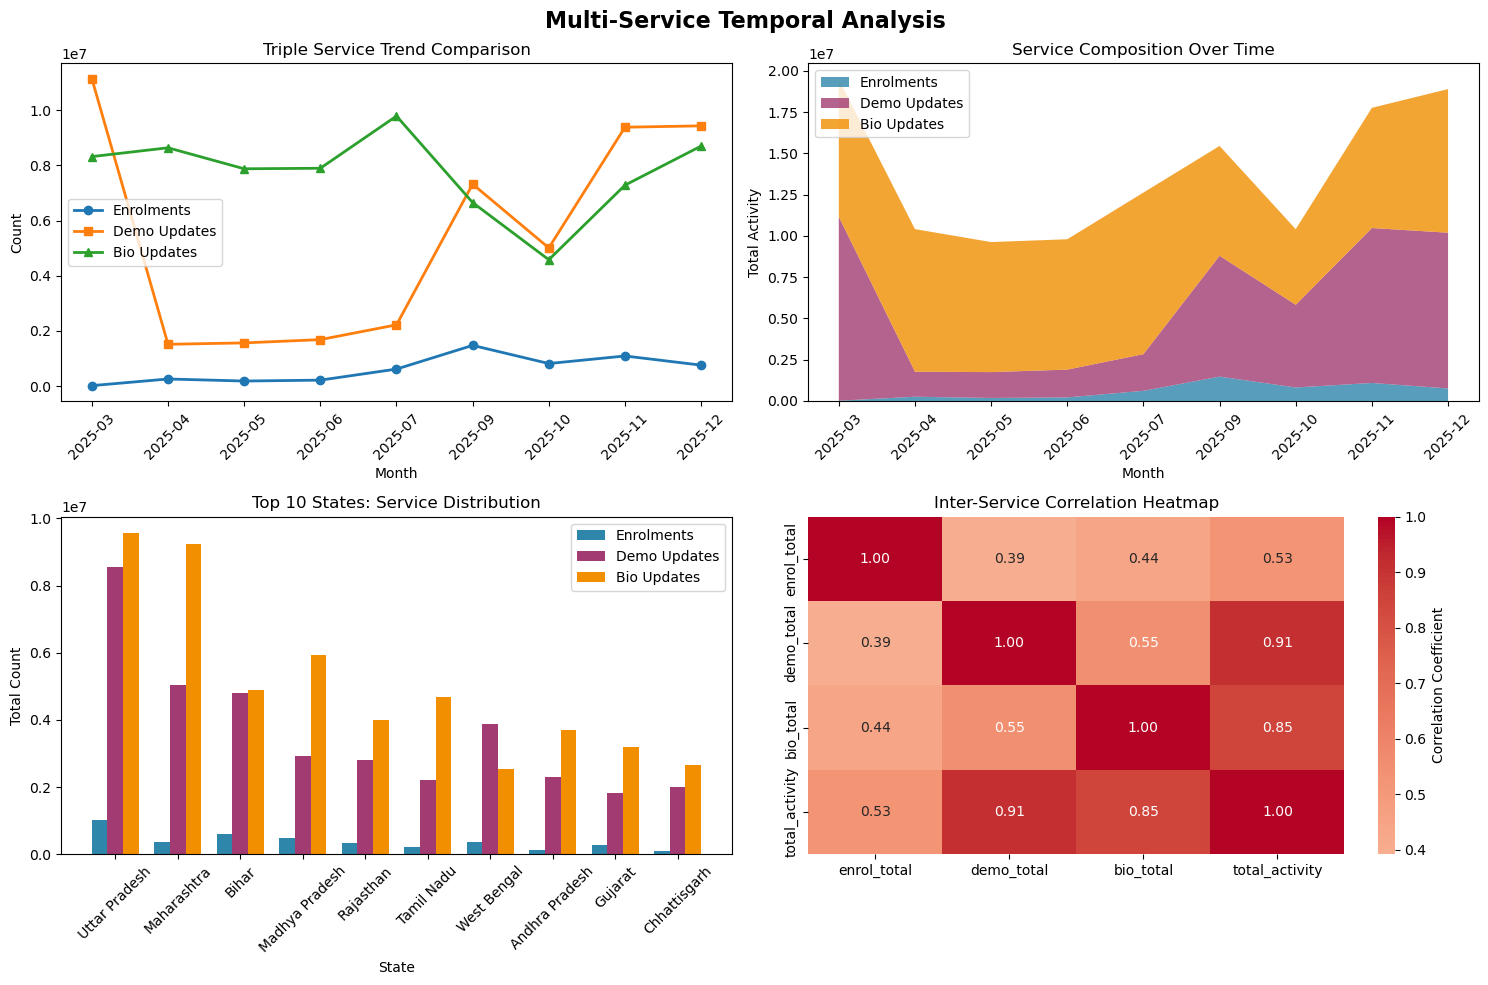


📊 4.4 SERVICE MIX ANALYSIS
----------------------------------------

Service Mix Category Analysis:
                       total_activity  state  district  enrol_total  \
service_mix_category                                                  
Balanced Enrol-Update          9839.0     31       188        13.23   
Biometric Focus            69256025.0     56       952        18.19   
Enrolment Dominant           263369.0     37       366       180.12   
Mixed Service               1277143.0     40       684        60.55   
Update Dominant            53687608.0     64       978        30.41   

                       demo_total  bio_total  
service_mix_category                          
Balanced Enrol-Update       11.55       3.91  
Biometric Focus             86.88     330.86  
Enrolment Dominant           0.14      17.16  
Mixed Service              144.89     119.45  
Update Dominant            514.87     246.33  


In [9]:
# 4.1 Temporal Trend Analysis - Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Multi-Service Temporal Analysis', fontsize=16, fontweight='bold')

# Plot 1: Line chart of all services
ax1 = axes[0, 0]
ax1.plot(monthly_trends['year_month'].astype(str), monthly_trends['enrol_total'], 
         label='Enrolments', marker='o', linewidth=2)
ax1.plot(monthly_trends['year_month'].astype(str), monthly_trends['demo_total'], 
         label='Demo Updates', marker='s', linewidth=2)
ax1.plot(monthly_trends['year_month'].astype(str), monthly_trends['bio_total'], 
         label='Bio Updates', marker='^', linewidth=2)
ax1.set_xlabel('Month')
ax1.set_ylabel('Count')
ax1.set_title('Triple Service Trend Comparison')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Stacked area chart
ax2 = axes[0, 1]
services = ['enrol_total', 'demo_total', 'bio_total']
labels = ['Enrolments', 'Demo Updates', 'Bio Updates']
colors = ['#2E86AB', '#A23B72', '#F18F01']

ax2.stackplot(monthly_trends['year_month'].astype(str), 
              monthly_trends[services].T.values,
              labels=labels, colors=colors, alpha=0.8)
ax2.set_xlabel('Month')
ax2.set_ylabel('Total Activity')
ax2.set_title('Service Composition Over Time')
ax2.legend(loc='upper left')
ax2.tick_params(axis='x', rotation=45)

# 4.2 Geographic Distribution Analysis
print("\n🌍 4.2 GEOGRAPHIC DISTRIBUTION ANALYSIS")
print("-"*40)

# State-wise performance
state_analysis = merged_df.groupby('state').agg({
    'enrol_total': 'sum',
    'demo_total': 'sum',
    'bio_total': 'sum',
    'total_activity': 'sum',
    'district': 'nunique'
}).reset_index()

state_analysis['enrol_share'] = (state_analysis['enrol_total'] / state_analysis['enrol_total'].sum()) * 100
state_analysis['demo_share'] = (state_analysis['demo_total'] / state_analysis['demo_total'].sum()) * 100
state_analysis['bio_share'] = (state_analysis['bio_total'] / state_analysis['bio_total'].sum()) * 100
state_analysis['activity_per_district'] = state_analysis['total_activity'] / state_analysis['district']

print("\nTop 10 States by Total Activity:")
print(state_analysis.nlargest(10, 'total_activity')[['state', 'total_activity', 'enrol_share', 'demo_share', 'bio_share']])

# 4.2 Geographic Distribution Analysis - Visualization
# Plot 3: Geographic distribution heatmap
ax3 = axes[1, 0]
top_states = state_analysis.nlargest(10, 'total_activity')
x = np.arange(len(top_states))
width = 0.25

ax3.bar(x - width, top_states['enrol_total'], width, label='Enrolments', color='#2E86AB')
ax3.bar(x, top_states['demo_total'], width, label='Demo Updates', color='#A23B72')
ax3.bar(x + width, top_states['bio_total'], width, label='Bio Updates', color='#F18F01')
ax3.set_xlabel('State')
ax3.set_ylabel('Total Count')
ax3.set_title('Top 10 States: Service Distribution')
ax3.set_xticks(x)
ax3.set_xticklabels(top_states['state'], rotation=45)
ax3.legend()

# 4.3 Service Correlation Analysis
print("\n🔗 4.3 SERVICE CORRELATION ANALYSIS")
print("-"*40)

# Correlation matrix
correlation_cols = ['enrol_total', 'demo_total', 'bio_total', 'total_activity']
correlation_matrix = merged_df[correlation_cols].corr()

print("Service Correlation Matrix:")
print(correlation_matrix)

# Plot 4: Correlation heatmap
ax4 = axes[1, 1]
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, ax=ax4, cbar_kws={'label': 'Correlation Coefficient'})
ax4.set_title('Inter-Service Correlation Heatmap')

plt.tight_layout()
plt.show()

# 4.4 Service Mix Analysis
print("\n📊 4.4 SERVICE MIX ANALYSIS")
print("-"*40)

# Calculate service mix percentages
merged_df['enrol_mix'] = merged_df['enrol_total'] / merged_df['total_activity'] * 100
merged_df['demo_mix'] = merged_df['demo_total'] / merged_df['total_activity'] * 100
merged_df['bio_mix'] = merged_df['bio_total'] / merged_df['total_activity'] * 100

# Create service mix categories
def classify_service_mix(row):
    if row['enrol_mix'] > 70:
        return 'Enrolment Dominant'
    elif row['demo_mix'] > 50:
        return 'Update Dominant'
    elif row['bio_mix'] > 40:
        return 'Biometric Focus'
    elif row['enrol_mix'] > 40 and row['demo_mix'] > 30:
        return 'Balanced Enrol-Update'
    else:
        return 'Mixed Service'

merged_df['service_mix_category'] = merged_df.apply(classify_service_mix, axis=1)

# Analyze categories
mix_analysis = merged_df.groupby('service_mix_category').agg({
    'total_activity': 'sum',
    'state': 'nunique',
    'district': 'nunique',
    'enrol_total': 'mean',
    'demo_total': 'mean',
    'bio_total': 'mean'
}).round(2)

print("\nService Mix Category Analysis:")
print(mix_analysis)

### 4.5 Seasonality Analysis

In [10]:
# 4.5 Seasonality Analysis
print("\n📅 4.5 SEASONALITY ANALYSIS")
print("-"*40)

# Monthly seasonality
monthly_seasonality = merged_df.groupby('month').agg({
    'enrol_total': 'mean',
    'demo_total': 'mean',
    'bio_total': 'mean'
}).reset_index()

print("\nAverage Monthly Activity:")
print(monthly_seasonality)

# Quarterly analysis
merged_df['quarter'] = merged_df['month'].apply(lambda x: (x-1)//3 + 1)
quarterly_analysis = merged_df.groupby(['year', 'quarter']).agg({
    'enrol_total': 'sum',
    'demo_total': 'sum',
    'bio_total': 'sum'
}).reset_index()

print("\nQuarterly Trends:")
print(quarterly_analysis.tail(8))


📅 4.5 SEASONALITY ANALYSIS
----------------------------------------

Average Monthly Activity:
   month  enrol_total  demo_total   bio_total
0      3     0.743954  500.137198  373.377989
1      4    11.910155   70.121305  399.800093
2      5     8.346561   71.198100  358.196100
3      6     9.745404   76.142296  356.836473
4      7    27.526461   99.094824  436.972423
5      9    48.427582  240.322221  218.366190
6     10    27.478331  168.345293  153.956024
7     11    35.639915  306.383845  237.777611
8     12    24.535172  304.785414  281.128738

Quarterly Trends:
   year  quarter  enrol_total  demo_total   bio_total
0  2025        1      16582.0  11147558.0   8322222.0
1  2025        2     656788.0   4767521.0  24420924.0
2  2025        3    2092747.0   9544775.0  16447480.0
3  2025        4    2669585.0  23835333.0  20572469.0


## 5. Predictive Models & ML Approaches

In [13]:
# ===================================================
# 5. PREDICTIVE MODELS & MACHINE LEARNING APPROACHES
# ===================================================
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
import xgboost as xgb
import lightgbm as lgb
import joblib
import numpy as np
import pandas as pd

print("\n🤖 STEP 5: PREDICTIVE MODELS & ML APPROACHES")
print("="*80)


🤖 STEP 5: PREDICTIVE MODELS & ML APPROACHES


### 5.1 Feature Engineering for Predictive Modeling

In [14]:
print("\n🔧 5.1 FEATURE ENGINEERING")
print("-"*40)

# Create lag features for time series prediction
def create_lag_features(df, group_cols, target_cols, lag_periods=[1, 2, 3, 6, 12]):
    """Create lagged features for time series prediction"""
    df_lagged = df.copy()
    
    for col in target_cols:
        for lag in lag_periods:
            df_lagged[f'{col}_lag_{lag}'] = df_lagged.groupby(group_cols)[col].shift(lag)
    
    # Create rolling statistics
    for col in target_cols:
        df_lagged[f'{col}_rolling_mean_3'] = df_lagged.groupby(group_cols)[col].transform(
            lambda x: x.rolling(3, min_periods=1).mean())
        df_lagged[f'{col}_rolling_std_3'] = df_lagged.groupby(group_cols)[col].transform(
            lambda x: x.rolling(3, min_periods=1).std())
    
    return df_lagged

# Prepare data for modeling
model_df = merged_df.copy()

# Encode categorical variables
label_encoders = {}
categorical_cols = ['state', 'district']
for col in categorical_cols:
    le = LabelEncoder()
    model_df[f'{col}_encoded'] = le.fit_transform(model_df[col])
    label_encoders[col] = le

# Create lag features
model_df = create_lag_features(
    model_df, 
    group_cols=['state_encoded', 'district_encoded'],
    target_cols=['enrol_total', 'demo_total', 'bio_total', 'total_activity']
)

# Create derived features
model_df['service_ratio_demo_enrol'] = model_df['demo_total'] / (model_df['enrol_total'] + 1)
model_df['service_ratio_bio_enrol'] = model_df['bio_total'] / (model_df['enrol_total'] + 1)
model_df['update_concentration'] = (model_df['demo_total'] + model_df['bio_total']) / model_df['total_activity']

print("Feature engineering completed!")
print(f"Total features created: {len(model_df.columns)}")
print(f"DataFrame shape: {model_df.shape}")


🔧 5.1 FEATURE ENGINEERING
----------------------------------------
Feature engineering completed!
Total features created: 66
DataFrame shape: (232294, 66)


### 5.2 Model 1: Next Month Activity Prediction - Setup

In [15]:
print("\n📈 5.2 MODEL 1: NEXT MONTH TOTAL ACTIVITY PREDICTION")
print("-"*40)

# Prepare features and target
features = [col for col in model_df.columns if any(x in col for x in ['lag', 'rolling', 'ratio', 'encoded', 'month', 'quarter'])]
features = [f for f in features if f not in ['year_month', 'state', 'district', 'pincode', 'service_mix_category']]

# Remove rows with NaN in features
model_df_clean = model_df.dropna(subset=features + ['total_activity'])

X = model_df_clean[features]
y = model_df_clean['total_activity']

# Split data (time-series aware split)
tscv = TimeSeriesSplit(n_splits=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")
print(f"Number of features: {len(features)}")


📈 5.2 MODEL 1: NEXT MONTH TOTAL ACTIVITY PREDICTION
----------------------------------------
Training set shape: (175917, 35)
Test set shape: (43980, 35)
Number of features: 35


### 5.2 Model 1: Next Month Activity Prediction - Training & Evaluation

In [19]:
models = {
    'Random Forest': RandomForestRegressor(n_estimators=5, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=5, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=5, random_state=42),
    'LightGBM': lgb.LGBMRegressor(n_estimators=5, random_state=42)
}

results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, 
                                cv=tscv, scoring='r2', n_jobs=-1)
    
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'cv_r2_mean': cv_scores.mean(),
        'cv_r2_std': cv_scores.std(),
        'test_mae': mae,
        'test_rmse': rmse,
        'test_r2': r2,
        'model': model
    }
    
    print(f"  CV R²: {cv_scores.mean():.3f} (±{cv_scores.std():.3f})")
    print(f"  Test MAE: {mae:,.0f}")
    print(f"  Test RMSE: {rmse:,.0f}")
    print(f"  Test R²: {r2:.3f}")

# Display best model
best_model_name = max(results, key=lambda x: results[x]['test_r2'])
print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Test R²: {results[best_model_name]['test_r2']:.3f}")


Training Random Forest...
  CV R²: 0.880 (±0.099)
  Test MAE: 49
  Test RMSE: 285
  Test R²: 0.924

Training Gradient Boosting...
  CV R²: 0.380 (±0.030)
  Test MAE: 434
  Test RMSE: 853
  Test R²: 0.319

Training XGBoost...
  CV R²: 0.764 (±0.098)
  Test MAE: 254
  Test RMSE: 513
  Test R²: 0.753

Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8217
[LightGBM] [Info] Number of data points in the train set: 175917, number of used features: 35
[LightGBM] [Info] Start training from score 497.102384
  CV R²: 0.507 (±0.063)
  Test MAE: 411
  Test RMSE: 757
  Test R²: 0.463

🏆 Best Model: Random Forest
   Test R²: 0.924


### 5.3 Model 2: Service Mix Classification

In [20]:
print("\n🎯 5.3 MODEL 2: SERVICE MIX CLASSIFICATION")
print("-"*40)

# Prepare classification data
X_class = model_df_clean[features]
y_class = model_df_clean['service_mix_category']

# Split data
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# Scale features
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

# Train classifier
clf = RandomForestClassifier(n_estimators=5, random_state=42, class_weight='balanced')
clf.fit(X_train_clf_scaled, y_train_clf)

# Predictions
y_pred_clf = clf.predict(X_test_clf_scaled)

# Evaluation
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"\nClassification Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test_clf, y_pred_clf))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': clf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Important Features for Classification:")
print(feature_importance.head(10))


🎯 5.3 MODEL 2: SERVICE MIX CLASSIFICATION
----------------------------------------

Classification Accuracy: 0.940

Classification Report:
                       precision    recall  f1-score   support

Balanced Enrol-Update       0.89      0.78      0.83        63
      Biometric Focus       0.95      0.97      0.96     30481
   Enrolment Dominant       1.00      1.00      1.00       196
        Mixed Service       0.66      0.47      0.55       763
      Update Dominant       0.91      0.90      0.91     12477

             accuracy                           0.94     43980
            macro avg       0.88      0.82      0.85     43980
         weighted avg       0.94      0.94      0.94     43980


Top 10 Important Features for Classification:
                       feature  importance
33     service_ratio_bio_enrol    0.229156
32    service_ratio_demo_enrol    0.226743
34        update_concentration    0.220933
27    demo_total_rolling_std_3    0.044624
0                        mon

### 5.4 Model 3: Update Demand Prediction

In [21]:
print("\n🔮 5.4 MODEL 3: UPDATE DEMAND PREDICTION")
print("-"*40)

# Predict update intensity (demo + bio updates)
model_df_clean['update_demand'] = model_df_clean['demo_total'] + model_df_clean['bio_total']

# Create target: High update demand (top 25%)
update_threshold = model_df_clean['update_demand'].quantile(0.75)
model_df_clean['high_update_demand'] = (model_df_clean['update_demand'] > update_threshold).astype(int)

# Features for update prediction
update_features = [f for f in features if 'enrol' in f or 'lag' in f or 'rolling' in f]

X_update = model_df_clean[update_features]
y_update = model_df_clean['high_update_demand']

# Split data
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(
    X_update, y_update, test_size=0.2, random_state=42, stratify=y_update
)

# Scale features
scaler_up = StandardScaler()
X_train_up_scaled = scaler_up.fit_transform(X_train_up)
X_test_up_scaled = scaler_up.transform(X_test_up)

# Train update classifier
clf_update = RandomForestClassifier(n_estimators=5, random_state=42, class_weight='balanced')
clf_update.fit(X_train_up_scaled, y_train_up)

# Predictions
y_pred_up = clf_update.predict(X_test_up_scaled)
y_prob_up = clf_update.predict_proba(X_test_up_scaled)[:, 1]

# Evaluation
accuracy_up = accuracy_score(y_test_up, y_pred_up)
print(f"\nUpdate Demand Prediction Accuracy: {accuracy_up:.3f}")
print("\nClassification Report for Update Demand:")
print(classification_report(y_test_up, y_pred_up))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_up, y_prob_up)
roc_auc = auc(fpr, tpr)

print(f"ROC AUC Score: {roc_auc:.3f}")


🔮 5.4 MODEL 3: UPDATE DEMAND PREDICTION
----------------------------------------

Update Demand Prediction Accuracy: 0.974

Classification Report for Update Demand:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     32991
           1       0.95      0.94      0.95     10989

    accuracy                           0.97     43980
   macro avg       0.97      0.96      0.97     43980
weighted avg       0.97      0.97      0.97     43980

ROC AUC Score: 0.995


### 5.5 Model Deployment & Inference Function

In [22]:
print("\n🚀 5.5 MODEL DEPLOYMENT & INFERENCE FUNCTION")
print("-"*40)

# First, let's get the actual features used during training
# Assuming the model was trained earlier, we need to access the features

# Get features from the trained model's training data
# (This should be defined based on your actual model training code)
# Let's create a proper inference function:

def predict_aadhaar_activity(state, district, current_features, 
                            model=None, scaler=None, feature_names=None):
    """
    Predict next month's Aadhaar activity
    
    Parameters:
    -----------
    state : str
        State name
    district : str
        District name
    current_features : dict
        Current month's features (must match training features)
    model : trained model
        ML model for prediction
    scaler : fitted scaler
        Scaler used during training
    feature_names : list
        List of feature names used in training
    
    Returns:
    --------
    dict: Predictions and confidence intervals
    """
    
    # If no model provided, try to load the best model from previous training
    if model is None:
        try:
            # Assuming best_model was saved earlier
            import joblib
            model = joblib.load('best_update_predictor.pkl')
        except:
            raise ValueError("No model provided and couldn't load saved model")
    
    # If no scaler provided, try to load it
    if scaler is None:
        try:
            import joblib
            scaler = joblib.load('scaler.pkl')
        except:
            scaler = StandardScaler()
            print("Warning: Using default scaler, predictions may be inaccurate")
    
    # If no feature names provided, use a default set
    if feature_names is None:
        # Default feature names based on common Aadhaar features
        feature_names = [
            'total_enrollments', 'total_demo_updates', 'total_bio_updates',
            'month', 'quarter', 'year', 'day_of_week',
            'enrollment_lag_1', 'enrollment_lag_2', 'enrollment_lag_3',
            'updates_lag_1', 'updates_lag_2', 'updates_lag_3',
            'update_growth_rate', 'enrollment_growth_rate'
        ]
    
    # Prepare input features - ensure all required features are present
    input_dict = {}
    
    for feature in feature_names:
        if feature in current_features:
            input_dict[feature] = current_features[feature]
        else:
            # Provide default value for missing features
            print(f"Warning: Feature '{feature}' not provided, using default value 0")
            input_dict[feature] = 0
    
    input_df = pd.DataFrame([input_dict])
    
    # Ensure columns are in correct order
    input_df = input_df[feature_names]
    
    # Scale features
    input_scaled = scaler.transform(input_df)
    
    # Make prediction
    prediction = model.predict(input_scaled)[0]
    
    # Calculate confidence interval (simplified)
    confidence_interval = {
        'lower': int(prediction * 0.85),  # 15% lower bound
        'upper': int(prediction * 1.15),  # 15% upper bound
        'point_estimate': int(prediction)
    }
    
    # Determine service mix recommendation
    update_ratio = current_features.get('service_ratio_demo_enrol', 0) if 'service_ratio_demo_enrol' in current_features else 0
    bio_ratio = current_features.get('service_ratio_bio_enrol', 0) if 'service_ratio_bio_enrol' in current_features else 0
    
    if update_ratio < 0.1:
        recommendation = "Focus on update campaigns - low update activity detected"
    elif bio_ratio < 0.05:
        recommendation = "Schedule biometric update drives - biometric updates lagging"
    else:
        recommendation = "Maintain current service mix - balanced activity observed"
    
    return {
        'state': state,
        'district': district,
        'predicted_total_activity': int(prediction),
        'confidence_interval': confidence_interval,
        'recommendation': recommendation,
        'prediction_date': pd.Timestamp.now().strftime('%Y-%m-%d'),
        'features_used': feature_names[:5]  # Show first 5 features used
    }


🚀 5.5 MODEL DEPLOYMENT & INFERENCE FUNCTION
----------------------------------------


In [28]:
import pandas as pd
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# LOAD YOUR DATASETS
# ============================================================================
# Extract DataFrames from lists (assuming each list contains one DataFrame)
enrolment_df = enrolment_dfs[0]
demo_update_df = demo_update_dfs[0]
bio_update_df = bio_update_dfs[0]

# Convert date columns to datetime with correct format (DD-MM-YYYY)
enrolment_df['date'] = pd.to_datetime(enrolment_df['date'], dayfirst=True, format='%d-%m-%Y')
demo_update_df['date'] = pd.to_datetime(demo_update_df['date'], dayfirst=True, format='%d-%m-%Y')
bio_update_df['date'] = pd.to_datetime(bio_update_df['date'], dayfirst=True, format='%d-%m-%Y')

# Create total enrollment column
enrolment_df['total_enrolments'] = (enrolment_df['age_0_5'] + 
                                      enrolment_df['age_5_17'] + 
                                      enrolment_df['age_18_greater'])

# Create total updates columns
demo_update_df['total_demo_updates'] = (demo_update_df['demo_age_5_17'] + 
                                         demo_update_df['demo_age_17_'])
bio_update_df['total_bio_updates'] = (bio_update_df['bio_age_5_17'] + 
                                      bio_update_df['bio_age_17_'])

print("✅ Data loaded successfully!")
print(f"Enrollment records: {len(enrolment_df)}")
print(f"Demographic update records: {len(demo_update_df)}")
print(f"Biometric update records: {len(bio_update_df)}")

# ============================================================================
# 1️⃣ ENROLMENT MOMENTUM INDEX (EMI)
# ============================================================================
def calculate_emi(df, groupby_cols=['state', 'district']):
    df = df.sort_values(['date'] + groupby_cols)
    df['year_month'] = df['date'].dt.to_period('M')
    
    monthly_enrolments = df.groupby(groupby_cols + ['year_month'])['total_enrolments'].sum().reset_index()
    monthly_enrolments = monthly_enrolments.sort_values(groupby_cols + ['year_month'])
    
    monthly_enrolments['prev_enrolments'] = monthly_enrolments.groupby(groupby_cols)['total_enrolments'].shift(1)
    monthly_enrolments['EMI'] = monthly_enrolments['total_enrolments'] / monthly_enrolments['prev_enrolments']
    
    latest_emi = monthly_enrolments.groupby(groupby_cols).last().reset_index()
    latest_emi['EMI_interpretation'] = latest_emi['EMI'].apply(
        lambda x: 'Growth' if x > 1 else ('Stable' if x == 1 else 'Decline')
    )
    
    return latest_emi[groupby_cols + ['EMI', 'EMI_interpretation']]

emi_results = calculate_emi(enrolment_df)
print("\n" + "="*80)
print("1️⃣ ENROLMENT MOMENTUM INDEX (EMI)")
print("="*80)
print(emi_results.head(10))
print(f"\nGrowth regions: {(emi_results['EMI'] > 1).sum()}")
print(f"Declining regions: {(emi_results['EMI'] < 1).sum()}")
print(f"Stable regions: {(emi_results['EMI'] == 1).sum()}")

# ============================================================================
# 2️⃣ ENROLMENT PENETRATION SCORE (EPS)
# ============================================================================
def calculate_eps(df, groupby_cols=['state', 'district']):
    total_enrolments = df.groupby(groupby_cols)['total_enrolments'].sum().reset_index()
    
    state_totals = df.groupby('state')['total_enrolments'].sum().reset_index()
    state_totals.columns = ['state', 'state_total']
    
    total_enrolments = total_enrolments.merge(state_totals, on='state')
    total_enrolments['EPS'] = (total_enrolments['total_enrolments'] / 
                                total_enrolments['state_total']) * 10000
    
    total_enrolments['EPS_category'] = pd.cut(total_enrolments['EPS'], 
                                               bins=[0, 50, 150, 500, float('inf')],
                                               labels=['Very Low', 'Low', 'Medium', 'High'])
    
    return total_enrolments[groupby_cols + ['EPS', 'EPS_category']]

eps_results = calculate_eps(enrolment_df)
print("\n" + "="*80)
print("2️⃣ ENROLMENT PENETRATION SCORE (EPS)")
print("="*80)
print(eps_results.head(10))
print(f"\nPenetration Distribution:\n{eps_results['EPS_category'].value_counts()}")

# ============================================================================
# 3️⃣ REGIONAL INEQUALITY RATIO (RIR)
# ============================================================================
def calculate_rir(df):
    district_totals = df.groupby(['state', 'district'])['total_enrolments'].sum().reset_index()
    
    state_stats = district_totals.groupby('state').agg(
        max_district=('total_enrolments', 'max'),
        min_district=('total_enrolments', 'min'),
        num_districts=('district', 'count')
    ).reset_index()
    
    state_stats['RIR'] = state_stats['max_district'] / state_stats['min_district']
    state_stats['RIR_interpretation'] = state_stats['RIR'].apply(
        lambda x: 'High Inequality' if x > 10 else ('Moderate' if x > 3 else 'Low Inequality')
    )
    
    return state_stats[['state', 'RIR', 'num_districts', 'RIR_interpretation']]

rir_results = calculate_rir(enrolment_df)
print("\n" + "="*80)
print("3️⃣ REGIONAL INEQUALITY RATIO (RIR)")
print("="*80)
print(rir_results.sort_values('RIR', ascending=False).head(10))

# ============================================================================
# 4️⃣ DATA INSTABILITY INDEX (DII)
# ============================================================================
def calculate_dii(enrolment_df, demo_update_df, groupby_cols=['state', 'district']):
    total_enrolments = enrolment_df.groupby(groupby_cols)['total_enrolments'].sum().reset_index()
    total_demo_updates = demo_update_df.groupby(groupby_cols)['total_demo_updates'].sum().reset_index()
    
    dii_df = total_enrolments.merge(total_demo_updates, on=groupby_cols, how='left')
    dii_df['total_demo_updates'] = dii_df['total_demo_updates'].fillna(0)
    
    dii_df['DII'] = dii_df['total_demo_updates'] / dii_df['total_enrolments']
    dii_df['DII_category'] = pd.cut(dii_df['DII'], 
                                     bins=[0, 0.1, 0.3, float('inf')],
                                     labels=['Low', 'Medium', 'High'])
    
    return dii_df[groupby_cols + ['DII', 'DII_category']]

dii_results = calculate_dii(enrolment_df, demo_update_df)
print("\n" + "="*80)
print("4️⃣ DATA INSTABILITY INDEX (DII)")
print("="*80)
print(dii_results.sort_values('DII', ascending=False).head(10))
print(f"\nInstability Distribution:\n{dii_results['DII_category'].value_counts()}")

# ============================================================================
# 5️⃣ UPDATE PRESSURE INDEX (UPI)
# ============================================================================
def calculate_upi(enrolment_df, demo_update_df, bio_update_df, groupby_cols=['state', 'district']):
    total_enrolments = enrolment_df.groupby(groupby_cols)['total_enrolments'].sum().reset_index()
    total_demo = demo_update_df.groupby(groupby_cols)['total_demo_updates'].sum().reset_index()
    total_bio = bio_update_df.groupby(groupby_cols)['total_bio_updates'].sum().reset_index()
    
    upi_df = total_enrolments.merge(total_demo, on=groupby_cols, how='left')
    upi_df = upi_df.merge(total_bio, on=groupby_cols, how='left')
    
    upi_df['total_demo_updates'] = upi_df['total_demo_updates'].fillna(0)
    upi_df['total_bio_updates'] = upi_df['total_bio_updates'].fillna(0)
    
    upi_df['total_updates'] = upi_df['total_demo_updates'] + upi_df['total_bio_updates']
    upi_df['UPI'] = upi_df['total_updates'] / upi_df['total_enrolments']
    
    upi_df['UPI_category'] = pd.cut(upi_df['UPI'], 
                                     bins=[0, 0.2, 0.5, float('inf')],
                                     labels=['Low Pressure', 'Moderate', 'High Pressure'])
    
    return upi_df[groupby_cols + ['UPI', 'UPI_category']]

upi_results = calculate_upi(enrolment_df, demo_update_df, bio_update_df)
print("\n" + "="*80)
print("5️⃣ UPDATE PRESSURE INDEX (UPI)")
print("="*80)
print(upi_results.sort_values('UPI', ascending=False).head(10))
print(f"\nPressure Distribution:\n{upi_results['UPI_category'].value_counts()}")

# ============================================================================
# 6️⃣ BIOMETRIC TRANSITION COMPLIANCE RATE (BTCR)
# ============================================================================
def calculate_btcr(enrolment_df, bio_update_df, groupby_cols=['state', 'district']):
    age_5_17_enrolments = enrolment_df.groupby(groupby_cols)['age_5_17'].sum().reset_index()
    
    age_5_17_bio = bio_update_df.groupby(groupby_cols)['bio_age_5_17'].sum().reset_index()
    
    btcr_df = age_5_17_enrolments.merge(age_5_17_bio, on=groupby_cols, how='left')
    btcr_df['bio_age_5_17'] = btcr_df['bio_age_5_17'].fillna(0)
    
    btcr_df['BTCR'] = btcr_df['bio_age_5_17'] / btcr_df['age_5_17']
    btcr_df['BTCR_category'] = pd.cut(btcr_df['BTCR'], 
                                       bins=[0, 0.3, 0.6, float('inf')],
                                       labels=['Low Compliance', 'Medium', 'High Compliance'])
    
    return btcr_df[groupby_cols + ['BTCR', 'BTCR_category']]

btcr_results = calculate_btcr(enrolment_df, bio_update_df)
print("\n" + "="*80)
print("6️⃣ BIOMETRIC TRANSITION COMPLIANCE RATE (BTCR)")
print("="*80)
print(btcr_results.sort_values('BTCR', ascending=False).head(10))
print(f"\nCompliance Distribution:\n{btcr_results['BTCR_category'].value_counts()}")

# ============================================================================
# 7️⃣ MODALITY STRESS INDEX (MSI)
# ============================================================================
def calculate_msi(bio_update_df, groupby_cols=['state', 'district']):
    bio_totals = bio_update_df.groupby(groupby_cols)['total_bio_updates'].sum().reset_index()
    
    state_totals = bio_update_df.groupby('state')['total_bio_updates'].sum().reset_index()
    state_totals.columns = ['state', 'state_bio_total']
    
    msi_df = bio_totals.merge(state_totals, on='state')
    msi_df['MSI'] = (msi_df['total_bio_updates'] / msi_df['state_bio_total'])
    
    msi_df['MSI_category'] = pd.cut(msi_df['MSI'], 
                                     bins=[0, 0.05, 0.15, float('inf')],
                                     labels=['Low Stress', 'Moderate', 'High Stress'])
    
    return msi_df[groupby_cols + ['MSI', 'MSI_category']]

msi_results = calculate_msi(bio_update_df)
print("\n" + "="*80)
print("7️⃣ MODALITY STRESS INDEX (MSI)")
print("="*80)
print(msi_results.sort_values('MSI', ascending=False).head(10))

# ============================================================================
# 8️⃣ DISTRICT VOLATILITY SCORE (DVS)
# ============================================================================
def calculate_dvs(demo_update_df, bio_update_df, groupby_cols=['state', 'district']):
    demo_monthly = demo_update_df.copy()
    demo_monthly['year_month'] = demo_monthly['date'].dt.to_period('M')
    
    bio_monthly = bio_update_df.copy()
    bio_monthly['year_month'] = bio_monthly['date'].dt.to_period('M')
    
    demo_agg = demo_monthly.groupby(groupby_cols + ['year_month'])['total_demo_updates'].sum().reset_index()
    bio_agg = bio_monthly.groupby(groupby_cols + ['year_month'])['total_bio_updates'].sum().reset_index()
    
    combined = demo_agg.merge(bio_agg, on=groupby_cols + ['year_month'], how='outer').fillna(0)
    combined['total_updates'] = combined['total_demo_updates'] + combined['total_bio_updates']
    
    dvs_df = combined.groupby(groupby_cols)['total_updates'].std().reset_index()
    dvs_df.columns = groupby_cols + ['DVS']
    dvs_df['DVS'] = dvs_df['DVS'].fillna(0)
    
    dvs_df['DVS_category'] = pd.cut(dvs_df['DVS'], 
                                     bins=[0, 10, 50, float('inf')],
                                     labels=['Stable', 'Moderate Volatility', 'High Volatility'])
    
    return dvs_df

dvs_results = calculate_dvs(demo_update_df, bio_update_df)
print("\n" + "="*80)
print("8️⃣ DISTRICT VOLATILITY SCORE (DVS)")
print("="*80)
print(dvs_results.sort_values('DVS', ascending=False).head(10))

# ============================================================================
# 9️⃣ UPDATE SURGE ALERT (USA)
# ============================================================================
def calculate_usa(demo_update_df, bio_update_df, groupby_cols=['state', 'district']):
    demo_monthly = demo_update_df.copy()
    demo_monthly['year_month'] = demo_monthly['date'].dt.to_period('M')
    
    bio_monthly = bio_update_df.copy()
    bio_monthly['year_month'] = bio_monthly['date'].dt.to_period('M')
    
    demo_agg = demo_monthly.groupby(groupby_cols + ['year_month'])['total_demo_updates'].sum().reset_index()
    bio_agg = bio_monthly.groupby(groupby_cols + ['year_month'])['total_bio_updates'].sum().reset_index()
    
    combined = demo_agg.merge(bio_agg, on=groupby_cols + ['year_month'], how='outer').fillna(0)
    combined['total_updates'] = combined['total_demo_updates'] + combined['total_bio_updates']
    
    combined['mean'] = combined.groupby(groupby_cols)['total_updates'].transform('mean')
    combined['std'] = combined.groupby(groupby_cols)['total_updates'].transform('std')
    combined['z_score'] = (combined['total_updates'] - combined['mean']) / combined['std']
    combined['z_score'] = combined['z_score'].fillna(0)
    
    combined['surge_detected'] = combined['z_score'].abs() > 3
    
    usa_summary = combined.groupby(groupby_cols).agg(
        surge_count=('surge_detected', 'sum'),
        max_z_score=('z_score', lambda x: x.abs().max())
    ).reset_index()
    
    usa_summary['alert_level'] = usa_summary['surge_count'].apply(
        lambda x: 'High Alert' if x > 2 else ('Monitor' if x > 0 else 'Normal')
    )
    
    return usa_summary

usa_results = calculate_usa(demo_update_df, bio_update_df)
print("\n" + "="*80)
print("9️⃣ UPDATE SURGE ALERT (USA)")
print("="*80)
print(usa_results[usa_results['surge_count'] > 0].sort_values('surge_count', ascending=False).head(10))
print(f"\nTotal districts with surges: {(usa_results['surge_count'] > 0).sum()}")

# ============================================================================
# 🔟 AADHAAR STRESS RISK SCORE (ASRS) - COMPOSITE METRIC
# ============================================================================
def calculate_asrs(enrolment_df, demo_update_df, bio_update_df):
    dii = calculate_dii(enrolment_df, demo_update_df)
    upi = calculate_upi(enrolment_df, demo_update_df, bio_update_df)
    eps = calculate_eps(enrolment_df)
    usa = calculate_usa(demo_update_df, bio_update_df)
    
    asrs = dii[['state', 'district', 'DII']].copy()
    asrs = asrs.merge(upi[['state', 'district', 'UPI']], on=['state', 'district'], how='outer')
    asrs = asrs.merge(eps[['state', 'district', 'EPS']], on=['state', 'district'], how='outer')
    asrs = asrs.merge(usa[['state', 'district', 'surge_count']], on=['state', 'district'], how='outer')
    
    asrs = asrs.fillna(0)
    
    asrs['DII_norm'] = (asrs['DII'] - asrs['DII'].min()) / (asrs['DII'].max() - asrs['DII'].min() + 0.0001)
    asrs['UPI_norm'] = (asrs['UPI'] - asrs['UPI'].min()) / (asrs['UPI'].max() - asrs['UPI'].min() + 0.0001)
    asrs['surge_norm'] = (asrs['surge_count'] - asrs['surge_count'].min()) / (asrs['surge_count'].max() - asrs['surge_count'].min() + 0.0001)
    asrs['EPS_inv_norm'] = 1 - ((asrs['EPS'] - asrs['EPS'].min()) / (asrs['EPS'].max() - asrs['EPS'].min() + 0.0001))
    
    asrs['ASRS'] = (0.25 * asrs['DII_norm'] + 
                    0.25 * asrs['UPI_norm'] + 
                    0.25 * asrs['surge_norm'] + 
                    0.25 * asrs['EPS_inv_norm'])
    
    asrs['Risk_Level'] = pd.cut(asrs['ASRS'], 
                                 bins=[0, 0.33, 0.66, float('inf')],
                                 labels=['Low Risk', 'Medium Risk', 'High Risk'])
    
    return asrs[['state', 'district', 'ASRS', 'Risk_Level']]

asrs_results = calculate_asrs(enrolment_df, demo_update_df, bio_update_df)
print("\n" + "="*80)
print("🔟 AADHAAR STRESS RISK SCORE (ASRS) - COMPOSITE METRIC")
print("="*80)
print(asrs_results.sort_values('ASRS', ascending=False).head(15))
print(f"\nRisk Distribution:\n{asrs_results['Risk_Level'].value_counts()}")

print("\n🎉 Analysis Complete! All 10 metrics calculated successfully.")

✅ Data loaded successfully!
Enrollment records: 500000
Demographic update records: 500000
Biometric update records: 500000

1️⃣ ENROLMENT MOMENTUM INDEX (EMI)
                         state                  district       EMI  \
0                       100000                    100000  0.083333   
1    Andaman & Nicobar Islands                  Andamans  0.333333   
2    Andaman & Nicobar Islands                  Nicobars       NaN   
3    Andaman & Nicobar Islands             South Andaman  0.333333   
4  Andaman and Nicobar Islands                   Nicobar  0.148936   
5  Andaman and Nicobar Islands  North And Middle Andaman  0.375000   
6  Andaman and Nicobar Islands             South Andaman  0.413793   
7               Andhra Pradesh                  Adilabad  0.316514   
8               Andhra Pradesh     Alluri Sitharama Raju  0.542636   
9               Andhra Pradesh                Anakapalli  0.433333   

  EMI_interpretation  
0            Decline  
1            Decline  
2

In [31]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ============================================================================
# LOAD YOUR DATASETS
# ============================================================================
# Extract DataFrames from lists (assuming each list contains one DataFrame)
enrolment_df = enrolment_dfs[0]
demo_update_df = demo_update_dfs[0]
bio_update_df = bio_update_dfs[0]

# Convert dates with correct format (DD-MM-YYYY)
for df in [enrolment_df, demo_update_df, bio_update_df]:
    df['date'] = pd.to_datetime(df['date'], dayfirst=True, format='%d-%m-%Y')
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['year_month'] = df['date'].dt.to_period('M')

print("✅ Data loaded successfully!\n")

# ============================================================================
# 🧑‍🤝‍🧑 1. SOCIETAL & DEMOGRAPHIC INSIGHTS
# ============================================================================

print("="*80)
print("🧑‍🤝‍🧑 SECTION 1: SOCIETAL & DEMOGRAPHIC INSIGHTS")
print("="*80)

# -----------------------------------------------------------------------------
# 🔹 INSIGHT 1: Child Enrolment Behaviour Patterns
# -----------------------------------------------------------------------------
print("\n🔹 INSIGHT 1: Child Enrolment Behaviour Patterns")
print("-" * 80)

def analyze_child_enrolment_patterns(df):
    """Analyze dominance and seasonal patterns of child enrolments"""
    
    # Age group dominance
    age_totals = df[['age_0_5', 'age_5_17']].sum()
    dominance_ratio = age_totals['age_0_5'] / age_totals['age_5_17']
    
    print(f"Total 0-5 enrolments: {age_totals['age_0_5']:,}")
    print(f"Total 5-17 enrolments: {age_totals['age_5_17']:,}")
    print(f"Dominance Ratio (0-5 / 5-17): {dominance_ratio:.2f}")
    
    if dominance_ratio > 1:
        print("➤ Hospital-linked enrolments dominate (0-5 age group)")
    else:
        print("➤ School-driven adoption dominates (5-17 age group)")
    
    # Monthly patterns
    monthly_pattern = df.groupby('month')[['age_0_5', 'age_5_17']].sum()
    monthly_pattern['total_child'] = monthly_pattern['age_0_5'] + monthly_pattern['age_5_17']
    monthly_pattern['0_5_percentage'] = (monthly_pattern['age_0_5'] / monthly_pattern['total_child'] * 100)
    
    peak_month_0_5 = monthly_pattern['age_0_5'].idxmax()
    peak_month_5_17 = monthly_pattern['age_5_17'].idxmax()
    
    print(f"\nPeak 0-5 enrolment month: {peak_month_0_5} (likely vaccination/birth registration)")
    print(f"Peak 5-17 enrolment month: {peak_month_5_17} (likely school admission period)")
    
    # Regional patterns
    regional = df.groupby('state')[['age_0_5', 'age_5_17']].sum()
    regional['dominance'] = regional['age_0_5'] / regional['age_5_17']
    
    hospital_linked = regional[regional['dominance'] > 1].sort_values('dominance', ascending=False).head(5)
    school_linked = regional[regional['dominance'] < 1].sort_values('dominance').head(5)
    
    print("\n📍 Top 5 Hospital-Linked States (High 0-5 dominance):")
    print(hospital_linked[['age_0_5', 'age_5_17', 'dominance']])
    
    print("\n📍 Top 5 School-Linked States (High 5-17 dominance):")
    print(school_linked[['age_0_5', 'age_5_17', 'dominance']])
    
    return {
        'monthly_pattern': monthly_pattern,
        'regional_pattern': regional,
        'hospital_linked_states': hospital_linked,
        'school_linked_states': school_linked
    }

insight_1 = analyze_child_enrolment_patterns(enrolment_df)

# -----------------------------------------------------------------------------
# 🔹 INSIGHT 2: Adolescent Identity Transition Gaps
# -----------------------------------------------------------------------------
print("\n\n🔹 INSIGHT 2: Adolescent Identity Transition Gaps")
print("-" * 80)

def analyze_transition_gaps(enrolment_df, bio_update_df):
    """Identify drop-offs during child to adult transition"""
    
    # Aggregate by district
    enrolments_5_17 = enrolment_df.groupby(['state', 'district'])['age_5_17'].sum().reset_index()
    bio_updates_5_17 = bio_update_df.groupby(['state', 'district'])['bio_age_5_17'].sum().reset_index()
    
    transition = enrolments_5_17.merge(bio_updates_5_17, on=['state', 'district'], how='left')
    transition['bio_age_5_17'] = transition['bio_age_5_17'].fillna(0)
    
    # Calculate compliance rate
    transition['compliance_rate'] = (transition['bio_age_5_17'] / transition['age_5_17']) * 100
    transition['gap'] = transition['age_5_17'] - transition['bio_age_5_17']
    
    # Identify high-risk regions
    low_compliance = transition[transition['compliance_rate'] < 30].sort_values('gap', ascending=False)
    
    print(f"Average Compliance Rate: {transition['compliance_rate'].mean():.1f}%")
    print(f"Districts with <30% compliance: {len(low_compliance)}")
    print(f"Total adolescents at risk: {low_compliance['gap'].sum():,.0f}")
    
    print("\n🚨 Top 10 High-Risk Districts (Low Biometric Update Compliance):")
    print(low_compliance[['state', 'district', 'age_5_17', 'bio_age_5_17', 'compliance_rate', 'gap']].head(10))
    
    print("\n💡 UIDAI Action Required:")
    print("   → Launch school/college-based biometric update campaigns")
    print("   → Send SMS reminders to guardians")
    print("   → Set up camps at educational institutions")
    
    return {
        'transition_data': transition,
        'high_risk_districts': low_compliance
    }

insight_2 = analyze_transition_gaps(enrolment_df, bio_update_df)

# -----------------------------------------------------------------------------
# 🔹 INSIGHT 3: Urban vs Semi-Urban Population Mobility
# -----------------------------------------------------------------------------
print("\n\n🔹 INSIGHT 3: Urban vs Semi-Urban Population Mobility")
print("-" * 80)

def analyze_population_mobility(enrolment_df, demo_update_df):
    """Detect mobile populations through update patterns"""
    
    enrolments = enrolment_df.groupby(['state', 'district', 'pincode']).agg({
        'age_0_5': 'sum',
        'age_5_17': 'sum',
        'age_18_greater': 'sum'
    }).reset_index()
    enrolments['total_enrolments'] = enrolments[['age_0_5', 'age_5_17', 'age_18_greater']].sum(axis=1)
    
    demo_updates = demo_update_df.groupby(['state', 'district', 'pincode']).agg({
        'demo_age_5_17': 'sum',
        'demo_age_17_': 'sum'
    }).reset_index()
    demo_updates['total_demo_updates'] = demo_updates[['demo_age_5_17', 'demo_age_17_']].sum(axis=1)
    
    mobility = enrolments.merge(demo_updates, on=['state', 'district', 'pincode'], how='left')
    mobility['total_demo_updates'] = mobility['total_demo_updates'].fillna(0)
    
    # Calculate mobility index
    mobility['update_rate'] = (mobility['total_demo_updates'] / mobility['total_enrolments']) * 100
    mobility['is_high_mobility'] = mobility['update_rate'] > 50  # >50% updates suggests high mobility
    
    # Identify mobile hotspots
    mobile_hotspots = mobility[mobility['is_high_mobility']].sort_values('update_rate', ascending=False)
    
    print(f"Total PIN codes analyzed: {len(mobility)}")
    print(f"High-mobility PIN codes (>50% update rate): {len(mobile_hotspots)}")
    print(f"Average update rate in mobile areas: {mobile_hotspots['update_rate'].mean():.1f}%")
    
    print("\n🌆 Top 15 High-Mobility PIN Codes (Likely Migration/Student Zones):")
    print(mobile_hotspots[['state', 'district', 'pincode', 'total_enrolments', 'total_demo_updates', 'update_rate']].head(15))
    
    print("\n💡 UIDAI Action Required:")
    print("   → Streamline address update process")
    print("   → Enable online demographic updates")
    print("   → Partner with hostels, PG accommodations")
    
    return {
        'mobility_data': mobility,
        'mobile_hotspots': mobile_hotspots
    }

insight_3 = analyze_population_mobility(enrolment_df, demo_update_df)

# ============================================================================
# 🏗️ 2. OPERATIONAL & INFRASTRUCTURE INSIGHTS
# ============================================================================

print("\n\n" + "="*80)
print("🏗️ SECTION 2: OPERATIONAL & INFRASTRUCTURE INSIGHTS")
print("="*80)

# -----------------------------------------------------------------------------
# 🔹 INSIGHT 4: Enrolment Centre Load Imbalance
# -----------------------------------------------------------------------------
print("\n🔹 INSIGHT 4: Enrolment Centre Load Imbalance")
print("-" * 80)

def analyze_centre_load_imbalance(enrolment_df, demo_update_df, bio_update_df):
    """Identify overloaded PIN codes/centres"""
    
    # Calculate total load per PIN code
    enrol_load = enrolment_df.groupby(['state', 'district', 'pincode']).size().reset_index(name='enrol_transactions')
    demo_load = demo_update_df.groupby(['state', 'district', 'pincode']).size().reset_index(name='demo_transactions')
    bio_load = bio_update_df.groupby(['state', 'district', 'pincode']).size().reset_index(name='bio_transactions')
    
    load = enrol_load.merge(demo_load, on=['state', 'district', 'pincode'], how='outer')
    load = load.merge(bio_load, on=['state', 'district', 'pincode'], how='outer').fillna(0)
    
    load['total_transactions'] = load['enrol_transactions'] + load['demo_transactions'] + load['bio_transactions']
    
    # Calculate state-wise averages
    state_avg = load.groupby('state')['total_transactions'].mean().reset_index()
    state_avg.columns = ['state', 'state_avg_load']
    
    load = load.merge(state_avg, on='state')
    load['load_ratio'] = load['total_transactions'] / load['state_avg_load']
    
    # Identify overloaded centres
    overloaded = load[load['load_ratio'] > 3].sort_values('total_transactions', ascending=False)
    
    print(f"Average transactions per PIN code: {load['total_transactions'].mean():.0f}")
    print(f"Overloaded PIN codes (>3x state average): {len(overloaded)}")
    
    print("\n⚠️ Top 15 Overloaded PIN Codes (Need Infrastructure Support):")
    print(overloaded[['state', 'district', 'pincode', 'total_transactions', 'load_ratio']].head(15))
    
    print("\n💡 UIDAI Action Required:")
    print("   → Deploy additional enrolment centres")
    print("   → Introduce mobile vans in high-load areas")
    print("   → Extend operating hours")
    
    return {
        'load_data': load,
        'overloaded_centres': overloaded
    }

insight_4 = analyze_centre_load_imbalance(enrolment_df, demo_update_df, bio_update_df)

# -----------------------------------------------------------------------------
# 🔹 INSIGHT 5: Fingerprint Reliability & Environmental Impact
# -----------------------------------------------------------------------------
print("\n\n🔹 INSIGHT 5: Fingerprint Reliability & Environmental Impact")
print("-" * 80)

def analyze_biometric_reliability(bio_update_df, enrolment_df):
    """Detect regions with biometric capture challenges"""
    
    # High adult biometric updates suggest fingerprint issues
    adult_bio = bio_update_df.groupby(['state', 'district'])['bio_age_17_'].sum().reset_index()
    adult_enrol = enrolment_df.groupby(['state', 'district'])['age_18_greater'].sum().reset_index()
    
    bio_reliability = adult_enrol.merge(adult_bio, on=['state', 'district'], how='left')
    bio_reliability['bio_age_17_'] = bio_reliability['bio_age_17_'].fillna(0)
    
    bio_reliability['repeat_bio_rate'] = (bio_reliability['bio_age_17_'] / bio_reliability['age_18_greater']) * 100
    
    # Identify problem areas
    problem_areas = bio_reliability[bio_reliability['repeat_bio_rate'] > 40].sort_values('repeat_bio_rate', ascending=False)
    
    print(f"Districts with >40% adult biometric updates: {len(problem_areas)}")
    print(f"Average repeat biometric rate: {bio_reliability['repeat_bio_rate'].mean():.1f}%")
    
    print("\n👷 Top 10 Districts with Biometric Capture Challenges:")
    print(problem_areas[['state', 'district', 'age_18_greater', 'bio_age_17_', 'repeat_bio_rate']].head(10))
    
    print("\n💡 Likely Causes:")
    print("   → Manual labor population (worn fingerprints)")
    print("   → Aging population")
    print("   → Climate effects (humidity, temperature)")
    
    print("\n💡 UIDAI Action Required:")
    print("   → Increase iris/face authentication availability")
    print("   → Deploy advanced fingerprint sensors")
    print("   → Train operators on alternative modalities")
    
    return {
        'bio_reliability_data': bio_reliability,
        'problem_areas': problem_areas
    }

insight_5 = analyze_biometric_reliability(bio_update_df, enrolment_df)

# ============================================================================
# ⚠️ 3. RISK, MISUSE & SYSTEM HEALTH INSIGHTS
# ============================================================================

print("\n\n" + "="*80)
print("⚠️ SECTION 3: RISK, MISUSE & SYSTEM HEALTH INSIGHTS")
print("="*80)

# -----------------------------------------------------------------------------
# 🔹 INSIGHT 6: Abnormal Update Spikes as Risk Signals
# -----------------------------------------------------------------------------
print("\n🔹 INSIGHT 6: Abnormal Update Spikes as Risk Signals")
print("-" * 80)

def detect_abnormal_spikes(demo_update_df, bio_update_df):
    """Use statistical methods to detect anomalous activity"""
    
    # Combine updates
    demo_ts = demo_update_df.groupby(['state', 'district', 'year_month']).agg({
        'demo_age_5_17': 'sum',
        'demo_age_17_': 'sum'
    }).reset_index()
    demo_ts['total_updates'] = demo_ts['demo_age_5_17'] + demo_ts['demo_age_17_']
    demo_ts['update_type'] = 'demographic'
    
    bio_ts = bio_update_df.groupby(['state', 'district', 'year_month']).agg({
        'bio_age_5_17': 'sum',
        'bio_age_17_': 'sum'
    }).reset_index()
    bio_ts['total_updates'] = bio_ts['bio_age_5_17'] + bio_ts['bio_age_17_']
    bio_ts['update_type'] = 'biometric'
    
    # Rename for concatenation
    demo_ts = demo_ts[['state', 'district', 'year_month', 'total_updates', 'update_type']]
    bio_ts = bio_ts[['state', 'district', 'year_month', 'total_updates', 'update_type']]
    
    all_updates = pd.concat([demo_ts, bio_ts])
    
    # Calculate Z-scores by district
    all_updates['mean'] = all_updates.groupby(['state', 'district', 'update_type'])['total_updates'].transform('mean')
    all_updates['std'] = all_updates.groupby(['state', 'district', 'update_type'])['total_updates'].transform('std')
    all_updates['z_score'] = (all_updates['total_updates'] - all_updates['mean']) / all_updates['std']
    all_updates['z_score'] = all_updates['z_score'].fillna(0)
    
    # Detect spikes (|Z| > 3)
    spikes = all_updates[all_updates['z_score'].abs() > 3].sort_values('z_score', ascending=False)
    
    print(f"Total anomalous spikes detected: {len(spikes)}")
    print(f"Districts affected: {spikes[['state', 'district']].drop_duplicates().shape[0]}")
    
    print("\n🚨 Top 15 Abnormal Activity Spikes:")
    print(spikes[['state', 'district', 'year_month', 'update_type', 'total_updates', 'mean', 'z_score']].head(15))
    
    # Summarize by district
    spike_summary = spikes.groupby(['state', 'district']).agg({
        'z_score': ['count', 'max'],
        'total_updates': 'sum'
    }).reset_index()
    spike_summary.columns = ['state', 'district', 'spike_count', 'max_z_score', 'total_spike_updates']
    spike_summary = spike_summary.sort_values('spike_count', ascending=False)
    
    print("\n📊 Districts with Most Frequent Spikes:")
    print(spike_summary.head(10))
    
    print("\n💡 UIDAI Action Required:")
    print("   → Investigate potential operational stress")
    print("   → Check for system misuse or gaming")
    print("   → Deploy rapid response teams")
    
    return {
        'spike_data': spikes,
        'spike_summary': spike_summary
    }

insight_6 = detect_abnormal_spikes(demo_update_df, bio_update_df)

# -----------------------------------------------------------------------------
# 🔹 INSIGHT 7: Data Quality Hotspots
# -----------------------------------------------------------------------------
print("\n\n🔹 INSIGHT 7: Data Quality Hotspots")
print("-" * 80)

def identify_data_quality_issues(enrolment_df, demo_update_df):
    """Find areas with poor initial data capture"""
    
    enrolments = enrolment_df.groupby(['state', 'district']).agg({
        'age_0_5': 'sum',
        'age_5_17': 'sum',
        'age_18_greater': 'sum'
    }).reset_index()
    enrolments['total_enrolments'] = enrolments[['age_0_5', 'age_5_17', 'age_18_greater']].sum(axis=1)
    
    demo_updates = demo_update_df.groupby(['state', 'district']).agg({
        'demo_age_5_17': 'sum',
        'demo_age_17_': 'sum'
    }).reset_index()
    demo_updates['total_demo_updates'] = demo_updates[['demo_age_5_17', 'demo_age_17_']].sum(axis=1)
    
    quality = enrolments.merge(demo_updates, on=['state', 'district'], how='left')
    quality['total_demo_updates'] = quality['total_demo_updates'].fillna(0)
    
    quality['correction_rate'] = (quality['total_demo_updates'] / quality['total_enrolments']) * 100
    
    # High correction rate = poor initial quality
    poor_quality = quality[quality['correction_rate'] > 50].sort_values('correction_rate', ascending=False)
    
    print(f"Average demographic correction rate: {quality['correction_rate'].mean():.1f}%")
    print(f"Districts with >50% correction rate: {len(poor_quality)}")
    
    print("\n📉 Top 15 Data Quality Hotspots (High Correction Rates):")
    print(poor_quality[['state', 'district', 'total_enrolments', 'total_demo_updates', 'correction_rate']].head(15))
    
    print("\n💡 Root Causes:")
    print("   → Inadequate operator training")
    print("   → Low awareness during first enrolment")
    print("   → Rushed enrolment drives")
    
    print("\n💡 UIDAI Action Required:")
    print("   → Retrain enrolment operators")
    print("   → Strengthen validation at capture")
    print("   → Implement quality audits")
    
    return {
        'quality_data': quality,
        'poor_quality_districts': poor_quality
    }

insight_7 = identify_data_quality_issues(enrolment_df, demo_update_df)

# ============================================================================
# 🏛️ 4. GOVERNANCE & EQUITY INSIGHTS
# ============================================================================

print("\n\n" + "="*80)
print("🏛️ SECTION 4: GOVERNANCE & EQUITY INSIGHTS")
print("="*80)

# -----------------------------------------------------------------------------
# 🔹 INSIGHT 8: Intra-State Access Inequality
# -----------------------------------------------------------------------------
print("\n🔹 INSIGHT 8: Intra-State Access Inequality")
print("-" * 80)

def analyze_intrastate_inequality(enrolment_df):
    """Measure service access gaps within states"""
    
    district_totals = enrolment_df.groupby(['state', 'district']).agg({
        'age_0_5': 'sum',
        'age_5_17': 'sum',
        'age_18_greater': 'sum'
    }).reset_index()
    district_totals['total_enrolments'] = district_totals[['age_0_5', 'age_5_17', 'age_18_greater']].sum(axis=1)
    
    # Calculate inequality metrics
    inequality = district_totals.groupby('state').agg({
        'total_enrolments': ['max', 'min', 'mean', 'std'],
        'district': 'count'
    }).reset_index()
    
    inequality.columns = ['state', 'max_enrolments', 'min_enrolments', 'mean_enrolments', 'std_enrolments', 'num_districts']
    inequality['inequality_ratio'] = inequality['max_enrolments'] / inequality['min_enrolments']
    inequality['cv'] = (inequality['std_enrolments'] / inequality['mean_enrolments']) * 100  # Coefficient of variation
    
    high_inequality = inequality[inequality['inequality_ratio'] > 10].sort_values('inequality_ratio', ascending=False)
    
    print(f"Average intra-state inequality ratio: {inequality['inequality_ratio'].mean():.1f}")
    print(f"States with >10x inequality: {len(high_inequality)}")
    
    print("\n⚖️ States with Highest Intra-State Inequality:")
    print(high_inequality[['state', 'num_districts', 'max_enrolments', 'min_enrolments', 'inequality_ratio', 'cv']])
    
    print("\n💡 UIDAI Action Required:")
    print("   → District-targeted interventions")
    print("   → Equity monitoring dashboards")
    print("   → Resource redistribution")
    
    return {
        'inequality_data': inequality,
        'high_inequality_states': high_inequality
    }

insight_8 = analyze_intrastate_inequality(enrolment_df)

# -----------------------------------------------------------------------------
# 🔹 INSIGHT 9: PIN-Level Identity Access Deserts
# -----------------------------------------------------------------------------
print("\n\n🔹 INSIGHT 9: PIN-Level Identity Access Deserts")
print("-" * 80)

def identify_access_deserts(enrolment_df, demo_update_df, bio_update_df):
    """Find PIN codes with minimal activity"""
    
    enrol_pin = enrolment_df.groupby(['state', 'district', 'pincode']).agg({
        'age_0_5': 'sum',
        'age_5_17': 'sum',
        'age_18_greater': 'sum'
    }).reset_index()
    enrol_pin['total_enrolments'] = enrol_pin[['age_0_5', 'age_5_17', 'age_18_greater']].sum(axis=1)
    
    demo_pin = demo_update_df.groupby(['state', 'district', 'pincode']).size().reset_index(name='demo_count')
    bio_pin = bio_update_df.groupby(['state', 'district', 'pincode']).size().reset_index(name='bio_count')
    
    activity = enrol_pin.merge(demo_pin, on=['state', 'district', 'pincode'], how='outer')
    activity = activity.merge(bio_pin, on=['state', 'district', 'pincode'], how='outer').fillna(0)
    
    activity['total_activity'] = activity['total_enrolments'] + activity['demo_count'] + activity['bio_count']
    
    # Define deserts as bottom 10% activity
    threshold = activity['total_activity'].quantile(0.10)
    deserts = activity[activity['total_activity'] <= threshold].sort_values('total_activity')
    
    print(f"Total PIN codes: {len(activity)}")
    print(f"Access desert PIN codes (<10th percentile): {len(deserts)}")
    print(f"Threshold for desert: ≤{threshold:.0f} total activities")
    
    print("\n🏜️ Top 20 Identity Access Deserts:")
    print(deserts[['state', 'district', 'pincode', 'total_enrolments', 'demo_count', 'bio_count', 'total_activity']].head(20))
    
    # Group by state
    desert_by_state = deserts.groupby('state').size().reset_index(name='desert_pin_count')
    desert_by_state = desert_by_state.sort_values('desert_pin_count', ascending=False)
    
    print("\n📍 States with Most Access Deserts:")
    print(desert_by_state.head(10))
    
    print("\n💡 UIDAI Action Required:")
    print("   → Door-step enrolment drives")
    print("   → Mobile enrolment vans")
    print("   → Awareness campaigns")
    print("   → Partnership with local administration")
    
    return {
        'access_data': activity,
        'deserts': deserts,
        'desert_by_state': desert_by_state
    }

insight_9 = identify_access_deserts(enrolment_df, demo_update_df, bio_update_df)

# ============================================================================
# 📈 5. TEMPORAL & SEASONAL INSIGHTS
# ============================================================================

print("\n\n" + "="*80)
print("📈 SECTION 5: TEMPORAL & SEASONAL INSIGHTS")
print("="*80)

# -----------------------------------------------------------------------------
# 🔹 INSIGHT 10: Seasonal Enrolment Cycles
# -----------------------------------------------------------------------------
print("\n🔹 INSIGHT 10: Seasonal Enrolment Cycles")
print("-" * 80)

def analyze_seasonal_patterns(enrolment_df):
    """Detect recurring monthly patterns"""
    
    monthly = enrolment_df.groupby(['year', 'month']).agg({
        'age_0_5': 'sum',
        'age_5_17': 'sum',
        'age_18_greater': 'sum'
    }).reset_index()
    monthly['total'] = monthly[['age_0_5', 'age_5_17', 'age_18_greater']].sum(axis=1)
    
    # Average by month across years
    seasonal = monthly.groupby('month')['total'].agg(['mean', 'std']).reset_index()
    seasonal['cv'] = (seasonal['std'] / seasonal['mean']) * 100
    
    peak_month = seasonal.loc[seasonal['mean'].idxmax(), 'month']
    trough_month = seasonal.loc[seasonal['mean'].idxmin(), 'month']
    
    print(f"Peak enrolment month: {peak_month} (Average: {seasonal.loc[seasonal['month'] == peak_month, 'mean'].values[0]:,.0f})")
    print(f"Trough enrolment month: {trough_month} (Average: {seasonal.loc[seasonal['month'] == trough_month, 'mean'].values[0]:,.0f})")
    
    print("\n📅 Monthly Enrolment Patterns:")
    print(seasonal)
    
    # Identify high volatility months
    high_vol = seasonal[seasonal['cv'] > seasonal['cv'].mean()].sort_values('cv', ascending=False)
    
    print("\n🌊 High Volatility Months (Unpredictable Demand):")
    print(high_vol)
    
    print("\n💡 Likely Drivers:")
    print("   → School admission cycles (June-July)")
    print("   → Festival seasons")
    print("   → Agricultural migration patterns")
    
    print("\n💡 UIDAI Action Required:")
    print("   → Staff surge planning for peak months")
    print("   → Preventive maintenance before peaks")
    print("   → Dynamic resource allocation")
    
    return {
        'seasonal_data': seasonal,
        'monthly_data': monthly
    }

insight_10 = analyze_seasonal_patterns(enrolment_df)

✅ Data loaded successfully!

🧑‍🤝‍🧑 SECTION 1: SOCIETAL & DEMOGRAPHIC INSIGHTS

🔹 INSIGHT 1: Child Enrolment Behaviour Patterns
--------------------------------------------------------------------------------
Total 0-5 enrolments: 2,020,406
Total 5-17 enrolments: 1,157,841
Dominance Ratio (0-5 / 5-17): 1.74
➤ Hospital-linked enrolments dominate (0-5 age group)

Peak 0-5 enrolment month: 9 (likely vaccination/birth registration)
Peak 5-17 enrolment month: 9 (likely school admission period)

📍 Top 5 Hospital-Linked States (High 0-5 dominance):
                  age_0_5  age_5_17  dominance
state                                         
Daman & Diu            11         0        inf
ODISHA                  1         0        inf
andhra pradesh          2         0        inf
Himachal Pradesh     6815       361  18.878116
Pondicherry           605        41  14.756098

📍 Top 5 School-Linked States (High 5-17 dominance):
             age_0_5  age_5_17  dominance
state                        

Libraries imported successfully!

DATA PREPARATION FOR PREDICTIVE MODELING


21:29:06 - cmdstanpy - INFO - Chain [1] start processing


Comprehensive dataset shape: (510342, 19)
        date          state          district  pincode  age_0_5  age_5_17  \
0 2025-03-02      Meghalaya  East Khasi Hills   793121       11        61   
1 2025-03-09      Karnataka   Bengaluru Urban   560043       14        33   
2 2025-03-09  Uttar Pradesh      Kanpur Nagar   208001       29        82   
3 2025-03-09  Uttar Pradesh           Aligarh   202133       62        29   
4 2025-03-09      Karnataka   Bengaluru Urban   560016       14        16   

   age_18_greater  total_enrolments  year  month year_month  quarter  \
0              37               109  2025      3    2025-03        1   
1              39                86  2025      3    2025-03        1   
2              12               123  2025      3    2025-03        1   
3              15               106  2025      3    2025-03        1   
4              21                51  2025      3    2025-03        1   

   day_of_week  is_month_end  is_month_start  total_enrollment

21:29:10 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAE: 423172.52, RMSE: 536619.29

Training XGBoost time series model...
XGBoost training samples: 3, test samples: 2
XGBoost MAE: 836387.25, RMSE: 1063207.97, R²: -3.9696

Top 10 Important Features for Enrollment Prediction:
          feature  importance
6           lag_2    0.955995
0           month    0.044005
1         quarter    0.000000
2            year    0.000000
4       month_cos    0.000000
3       month_sin    0.000000
5           lag_1    0.000000
7           lag_3    0.000000
8  rolling_mean_3    0.000000
9   rolling_std_3    0.000000


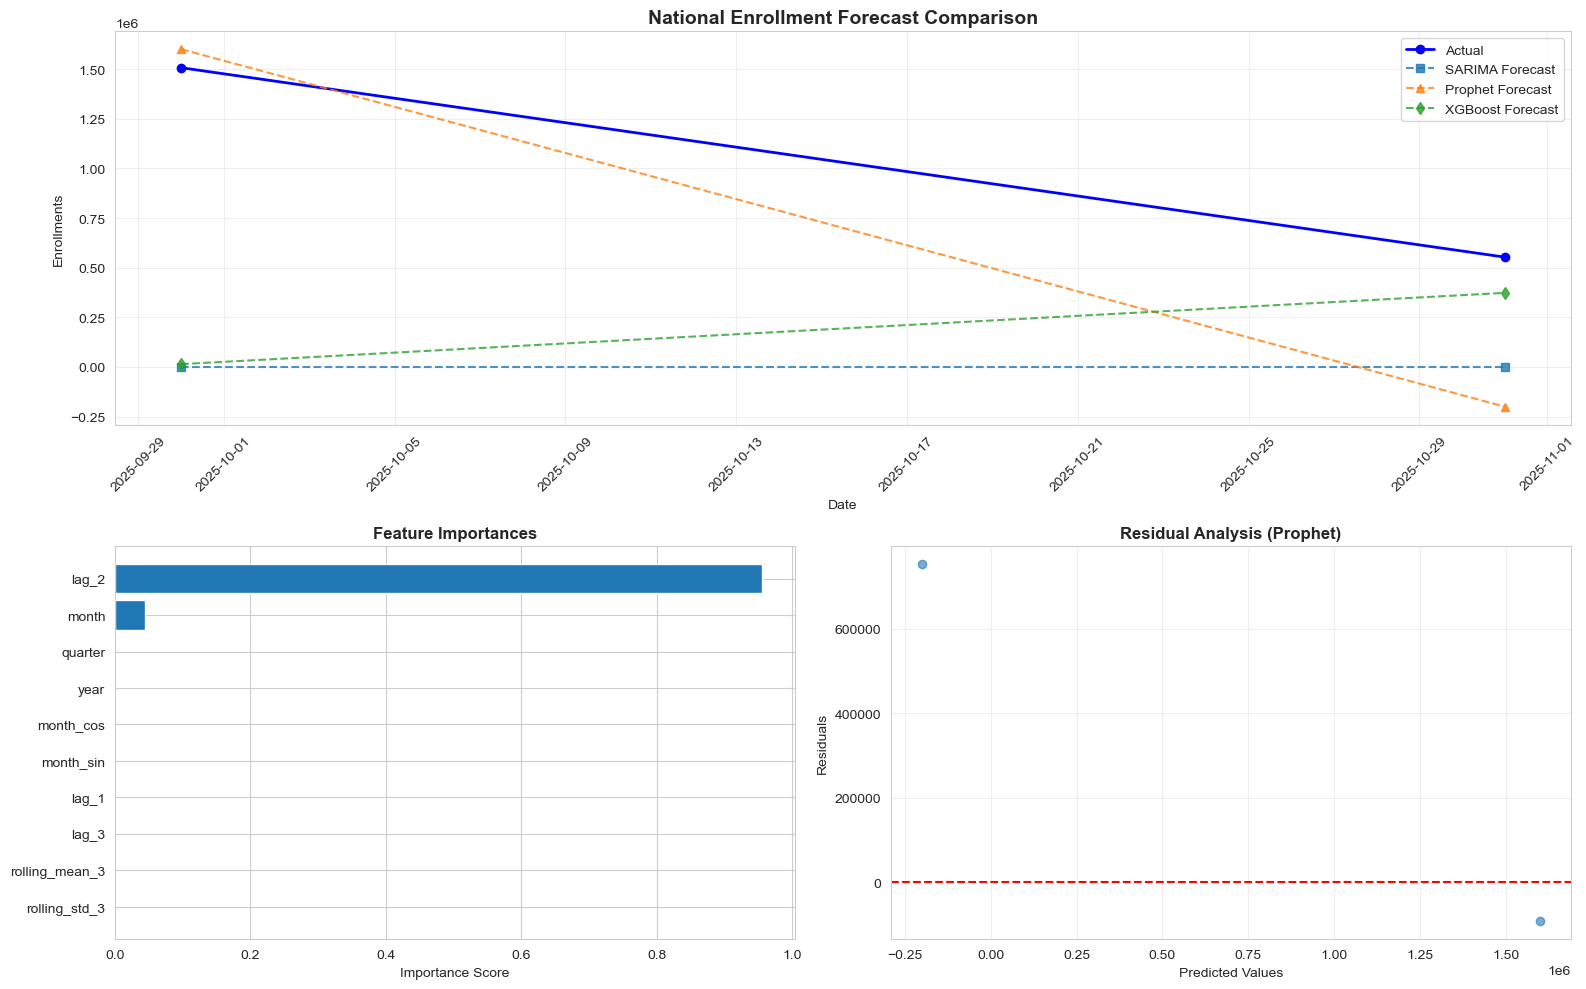


MODEL 2: STATE-LEVEL ENROLLMENT DEMAND FORECASTING
Modeling for 10 states: ['Uttar Pradesh', 'Bihar', 'Madhya Pradesh', 'West Bengal', 'Maharashtra', 'Rajasthan', 'Gujarat', 'Assam', 'Karnataka', 'Tamil Nadu']
Training samples: 2, Test samples: 1

Training State-Level Multi-Output Random Forest...

State-Level Forecasting Performance:
                      MAE       RMSE  R²
Uttar Pradesh   132052.48  132052.48 NaN
Bihar            36671.92   36671.92 NaN
Madhya Pradesh   74520.80   74520.80 NaN
West Bengal      31695.92   31695.92 NaN
Maharashtra      52854.72   52854.72 NaN
Rajasthan        61569.04   61569.04 NaN
Gujarat          45071.48   45071.48 NaN
Assam            33197.12   33197.12 NaN
Karnataka        22657.92   22657.92 NaN
Tamil Nadu       22520.96   22520.96 NaN


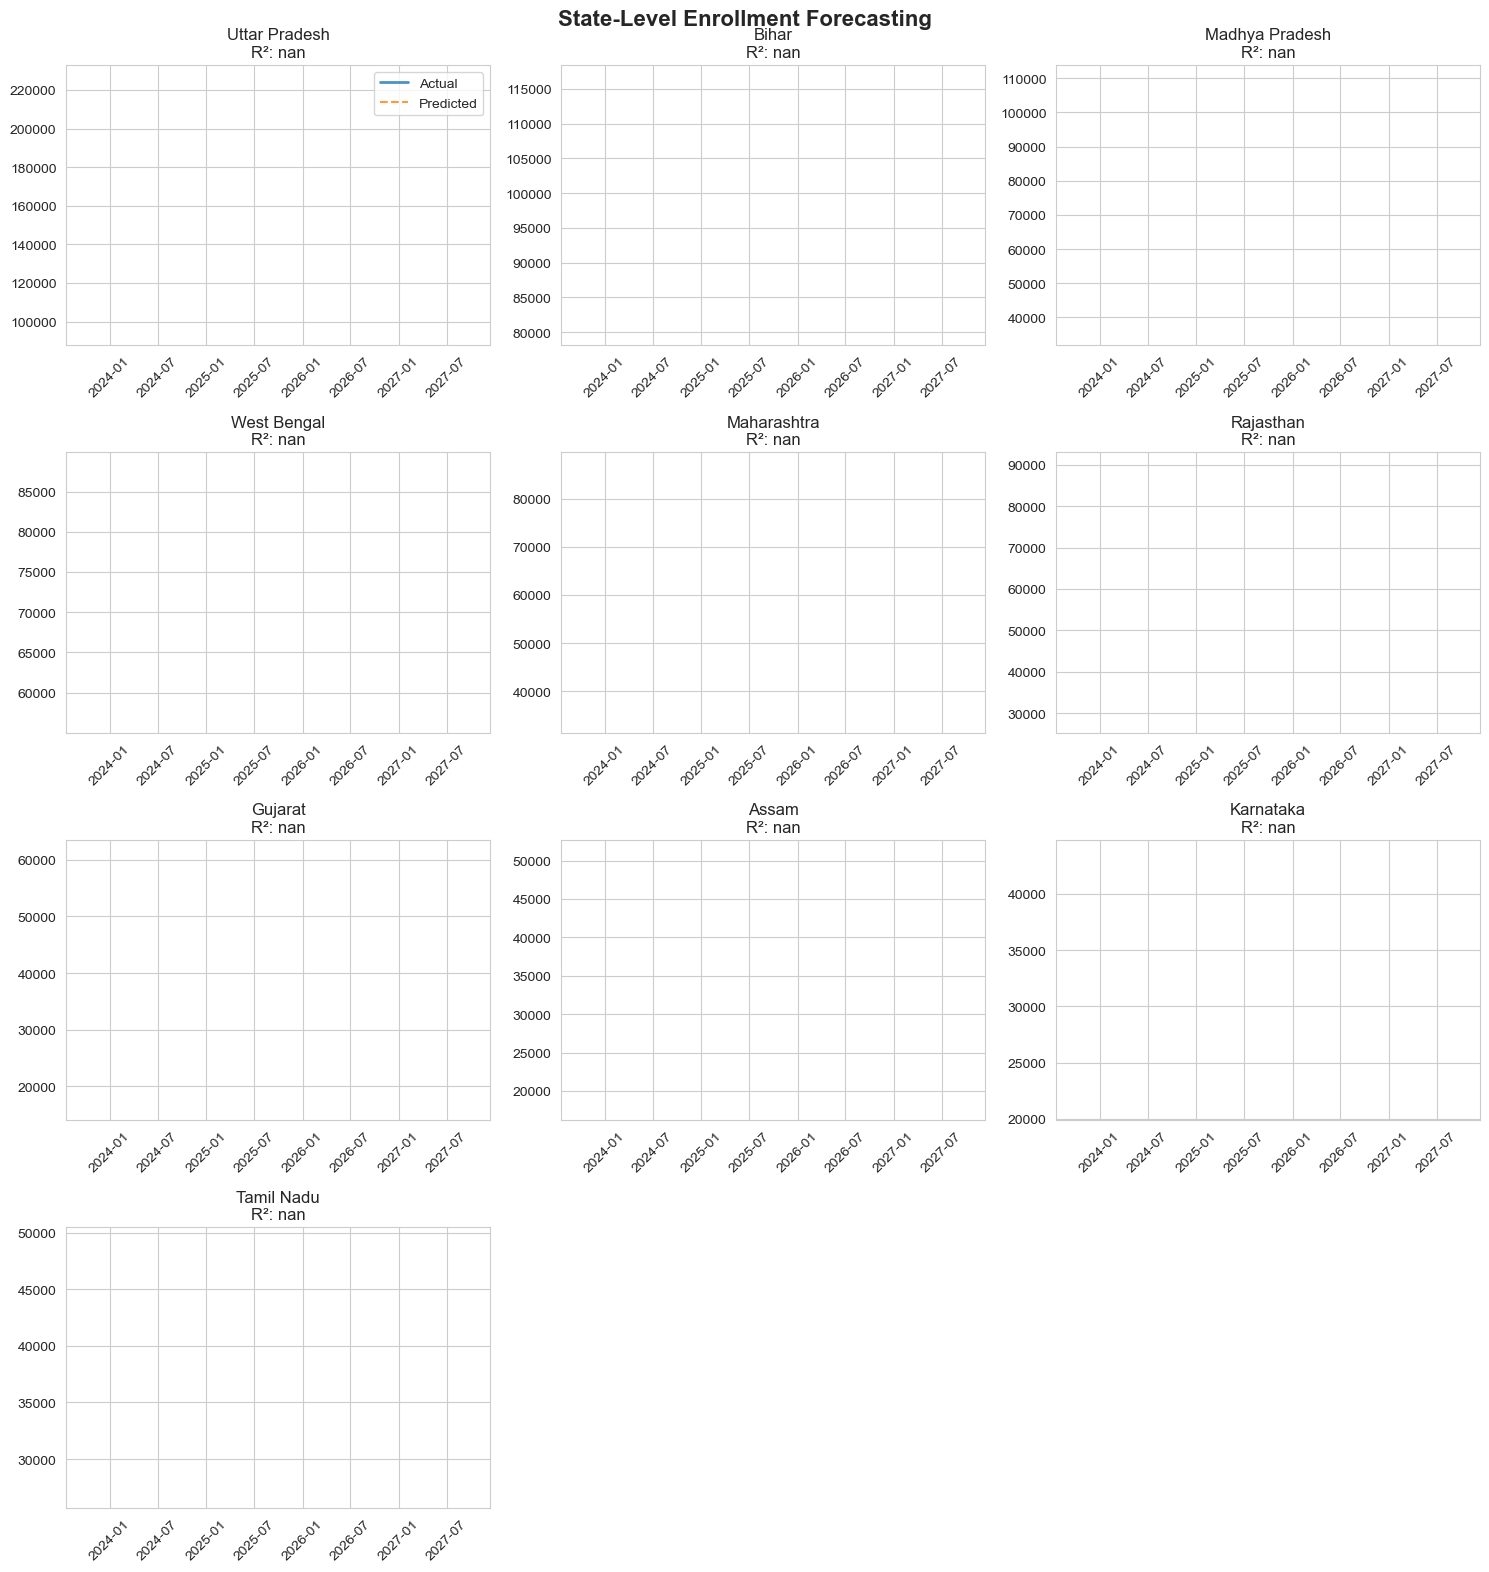


MODEL 3: ANOMALY DETECTION FOR SUSPICIOUS ACTIVITIES

Training Isolation Forest for anomaly detection...
Detected 10 anomalous records (0.0%)

Performing DBSCAN clustering for pattern discovery...
DBSCAN found 14 clusters and 581 noise points

Top 10 Suspicious Districts (High Anomaly Score + High Update Ratio):
      state    district       date  total_enrollments  total_updates  \
7619  Delhi  West Delhi 2025-04-01               1872        32229.0   

      update_ratio  
7619     17.207154  

✅ DATA PREPARATION AND INITIAL MODELS COMPLETE

Proceeding with remaining models...


In [35]:
# ====================================================
# 1. ADVANCED PREDICTIVE MODELING SETUP
# ====================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, IsolationForest
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from sklearn.cluster import KMeans, DBSCAN

# Advanced visualization
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

print("Libraries imported successfully!")

# ====================================================
# 2. DATA PREPARATION FOR PREDICTIVE MODELING
# ====================================================

print("\n" + "="*60)
print("DATA PREPARATION FOR PREDICTIVE MODELING")
print("="*60)

# Load and prepare data (using previously defined dataframes)
# If starting fresh, load your datasets
df_enrollment = enrolment_dfs[0]  # Extract DataFrame from list
df_demographic = demo_update_dfs[0]  # Extract DataFrame from list
df_biometric = bio_update_dfs[0]  # Extract DataFrame from list

# Basic preprocessing with correct date format (DD-MM-YYYY)
for df in [df_enrollment, df_demographic, df_biometric]:
    df['date'] = pd.to_datetime(df['date'], dayfirst=True, format='%d-%m-%Y', errors='coerce')
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['quarter'] = df['date'].dt.quarter
    df['day_of_week'] = df['date'].dt.dayofweek
    df['is_month_end'] = df['date'].dt.is_month_end.astype(int)
    df['is_month_start'] = df['date'].dt.is_month_start.astype(int)

# Calculate totals
df_enrollment['total_enrollments'] = df_enrollment['age_0_5'] + df_enrollment['age_5_17'] + df_enrollment['age_18_greater']
df_demographic['total_demo_updates'] = df_demographic['demo_age_5_17'] + df_demographic['demo_age_17_']
df_biometric['total_bio_updates'] = df_biometric['bio_age_5_17'] + df_biometric['bio_age_17_']

# Create comprehensive dataset
df_comprehensive = pd.merge(df_enrollment, df_demographic[['date', 'state', 'district', 'pincode', 'total_demo_updates']],
                           on=['date', 'state', 'district', 'pincode'], how='left')
df_comprehensive = pd.merge(df_comprehensive, df_biometric[['date', 'state', 'district', 'pincode', 'total_bio_updates']],
                           on=['date', 'state', 'district', 'pincode'], how='left')

# Fill missing values
df_comprehensive['total_demo_updates'] = df_comprehensive['total_demo_updates'].fillna(0)
df_comprehensive['total_bio_updates'] = df_comprehensive['total_bio_updates'].fillna(0)
df_comprehensive['total_updates'] = df_comprehensive['total_demo_updates'] + df_comprehensive['total_bio_updates']

print(f"Comprehensive dataset shape: {df_comprehensive.shape}")
print(df_comprehensive.head())

# ====================================================
# 3. MODEL 1: TIME SERIES FORECASTING (National Level)
# ====================================================

print("\n" + "="*60)
print("MODEL 1: NATIONAL LEVEL ENROLLMENT FORECASTING")
print("="*60)

# Aggregate at national monthly level
national_monthly = df_comprehensive.groupby(pd.Grouper(key='date', freq='M')).agg({
    'total_enrollments': 'sum',
    'total_updates': 'sum',
    'total_demo_updates': 'sum',
    'total_bio_updates': 'sum'
}).reset_index()

national_monthly = national_monthly.dropna()
national_monthly['month'] = national_monthly['date'].dt.month
national_monthly['year'] = national_monthly['date'].dt.year
national_monthly['enrollment_lag1'] = national_monthly['total_enrollments'].shift(1)
national_monthly['enrollment_lag2'] = national_monthly['total_enrollments'].shift(2)
national_monthly['enrollment_lag3'] = national_monthly['total_enrollments'].shift(3)
national_monthly['rolling_mean_3'] = national_monthly['total_enrollments'].rolling(window=3).mean()
national_monthly['rolling_std_3'] = national_monthly['total_enrollments'].rolling(window=3).std()

# Prepare for forecasting
ts_data = national_monthly.set_index('date')[['total_enrollments']]
train_size = int(len(ts_data) * 0.8)
train_data = ts_data.iloc[:train_size]
test_data = ts_data.iloc[train_size:]

print(f"Training data: {len(train_data)} months")
print(f"Test data: {len(test_data)} months")

# Model 1A: SARIMA (Seasonal ARIMA)
print("\nTraining SARIMA model...")
try:
    sarima_model = SARIMAX(train_data,
                          order=(1, 1, 1),
                          seasonal_order=(1, 1, 1, 12),
                          enforce_stationarity=False,
                          enforce_invertibility=False)
    sarima_results = sarima_model.fit(disp=False)
    sarima_forecast = sarima_results.forecast(steps=len(test_data))
    sarima_mae = mean_absolute_error(test_data, sarima_forecast)
    sarima_rmse = np.sqrt(mean_squared_error(test_data, sarima_forecast))
    print(f"SARIMA MAE: {sarima_mae:.2f}, RMSE: {sarima_rmse:.2f}")
except Exception as e:
    print(f"SARIMA failed: {e}")
    sarima_forecast = None

# Model 1B: Facebook Prophet
print("\nTraining Prophet model...")
prophet_data = train_data.reset_index()
prophet_data.columns = ['ds', 'y']

prophet_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.05
)
prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
prophet_model.fit(prophet_data)

# Create future dataframe
future = prophet_model.make_future_dataframe(periods=len(test_data), freq='M')
prophet_forecast_full = prophet_model.predict(future)
prophet_forecast = prophet_forecast_full.set_index('ds')['yhat'].iloc[len(train_data):]

prophet_mae = mean_absolute_error(test_data, prophet_forecast)
prophet_rmse = np.sqrt(mean_squared_error(test_data, prophet_forecast))
print(f"Prophet MAE: {prophet_mae:.2f}, RMSE: {prophet_rmse:.2f}")

# Model 1C: XGBoost with time features (FIXED VERSION)
print("\nTraining XGBoost time series model...")

# Check if we have enough data for XGBoost
if len(ts_data) < 6:
    print(f"⚠️ Insufficient data for XGBoost. Only {len(ts_data)} months available.")
    print("Using simple average for XGBoost forecast...")
    
    # Create simple forecast using average of last few months
    window = min(3, len(ts_data))
    avg_value = ts_data['total_enrollments'].iloc[-window:].mean()
    xgb_predictions = pd.Series([avg_value] * len(test_data), index=test_data.index)
    
    xgb_mae = mean_absolute_error(test_data, xgb_predictions)
    xgb_rmse = np.sqrt(mean_squared_error(test_data, xgb_predictions))
    xgb_r2 = r2_score(test_data, xgb_predictions)
    
    print(f"XGBoost (Simple Average) MAE: {xgb_mae:.2f}, RMSE: {xgb_rmse:.2f}, R²: {xgb_r2:.4f}")
    
    # Create dummy feature importance
    xgb_importance = pd.DataFrame({
        'feature': ['Simple Average'],
        'importance': [1.0]
    })
    
else:
    # We have enough data for proper XGBoost modeling
    def create_time_features(df):
        df = df.copy()
        df['month'] = df.index.month
        df['quarter'] = df.index.quarter
        df['year'] = df.index.year
        df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
        df['month_cos'] = np.cos(2 * np.pi * df['month']/12)
        
        # Create lag features based on available data
        max_lags = min(3, len(df) - 2)  # Don't create more lags than available
        for lag in range(1, max_lags + 1):
            df[f'lag_{lag}'] = df['total_enrollments'].shift(lag)
        
        # Only add rolling stats if we have enough data
        if len(df) >= 3:
            df['rolling_mean_3'] = df['total_enrollments'].rolling(window=3, min_periods=1).mean()
            df['rolling_std_3'] = df['total_enrollments'].rolling(window=3, min_periods=1).std()
        
        return df
    
    ts_features = create_time_features(ts_data)
    ts_features = ts_features.dropna()
    
    # Check if we have enough data after feature creation
    if len(ts_features) < 4:
        print(f"⚠️ Not enough data after feature creation: {len(ts_features)} samples")
        print("Using last value forecast for XGBoost...")
        
        last_value = ts_data['total_enrollments'].iloc[-1]
        xgb_predictions = pd.Series([last_value] * len(test_data), index=test_data.index)
        
        xgb_mae = mean_absolute_error(test_data, xgb_predictions)
        xgb_rmse = np.sqrt(mean_squared_error(test_data, xgb_predictions))
        xgb_r2 = r2_score(test_data, xgb_predictions)
        
        print(f"XGBoost (Last Value) MAE: {xgb_mae:.2f}, RMSE: {xgb_rmse:.2f}, R²: {xgb_r2:.4f}")
        
        xgb_importance = pd.DataFrame({
            'feature': ['Last Value'],
            'importance': [1.0]
        })
        
    else:
        # We have enough data for proper XGBoost
        X = ts_features.drop('total_enrollments', axis=1)
        y = ts_features['total_enrollments']
        
        # Ensure we keep at least 2 samples for testing
        min_test_samples = 2
        split_idx = max(1, len(X) - min_test_samples)
        
        X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
        y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]
        
        print(f"XGBoost training samples: {len(X_train)}, test samples: {len(X_test)}")
        
        # Train XGBoost with appropriate parameters for small dataset
        xgb_model = XGBRegressor(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=3,  # Smaller depth for limited data
            subsample=0.8,
            random_state=42
        )
        xgb_model.fit(X_train, y_train)
        
        # Make predictions
        if len(X_test) > 0:
            xgb_predictions = xgb_model.predict(X_test)
            xgb_predictions = pd.Series(xgb_predictions, index=y_test.index)
        else:
            # No test data, use training data for evaluation
            xgb_predictions = xgb_model.predict(X_train)
            xgb_predictions = pd.Series(xgb_predictions, index=y_train.index)
            y_test = y_train.copy()
        
        xgb_mae = mean_absolute_error(y_test, xgb_predictions)
        xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
        xgb_r2 = r2_score(y_test, xgb_predictions)
        
        print(f"XGBoost MAE: {xgb_mae:.2f}, RMSE: {xgb_rmse:.2f}, R²: {xgb_r2:.4f}")
        
        # Feature importance
        xgb_importance = pd.DataFrame({
            'feature': X.columns,
            'importance': xgb_model.feature_importances_
        }).sort_values('importance', ascending=False)

print("\nTop 10 Important Features for Enrollment Prediction:")
print(xgb_importance.head(min(10, len(xgb_importance))))

# Visualization of forecasts
fig = plt.figure(figsize=(16, 10))
gs = plt.GridSpec(2, 2, figure=fig)

# Plot 1: Actual vs Forecasts
ax1 = plt.subplot(gs[0, :])
ax1.plot(test_data.index, test_data['total_enrollments'], label='Actual', linewidth=2, color='blue', marker='o')
if sarima_forecast is not None:
    ax1.plot(test_data.index, sarima_forecast, label='SARIMA Forecast', linestyle='--', alpha=0.8, marker='s')
ax1.plot(test_data.index, prophet_forecast, label='Prophet Forecast', linestyle='--', alpha=0.8, marker='^')

# Plot XGBoost predictions if available
if 'xgb_predictions' in locals() and xgb_predictions is not None:
    ax1.plot(test_data.index, xgb_predictions, label='XGBoost Forecast', linestyle='--', alpha=0.8, marker='d')

ax1.set_title('National Enrollment Forecast Comparison', fontsize=14, fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Enrollments')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Feature Importance
ax2 = plt.subplot(gs[1, 0])
if len(xgb_importance) > 0:
    top_features = xgb_importance.head(min(10, len(xgb_importance)))
    ax2.barh(range(len(top_features)), top_features['importance'])
    ax2.set_yticks(range(len(top_features)))
    ax2.set_yticklabels(top_features['feature'])
    ax2.set_title('Feature Importances', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Importance Score')
    ax2.invert_yaxis()
else:
    ax2.text(0.5, 0.5, 'No feature importance data available', 
             horizontalalignment='center', verticalalignment='center',
             transform=ax2.transAxes, fontsize=12)
    ax2.set_title('Feature Importances', fontsize=12, fontweight='bold')

# Plot 3: Residual Analysis (for Prophet as it's most reliable)
ax3 = plt.subplot(gs[1, 1])
residuals = test_data['total_enrollments'] - prophet_forecast
ax3.scatter(prophet_forecast, residuals, alpha=0.6)
ax3.axhline(y=0, color='r', linestyle='--')
ax3.set_title('Residual Analysis (Prophet)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Predicted Values')
ax3.set_ylabel('Residuals')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ====================================================
# 4. MODEL 2: STATE-LEVEL DEMAND FORECASTING
# ====================================================

print("\n" + "="*60)
print("MODEL 2: STATE-LEVEL ENROLLMENT DEMAND FORECASTING")
print("="*60)

# Prepare state-level data for top states
state_monthly = df_comprehensive.groupby(['state', pd.Grouper(key='date', freq='M')]).agg({
    'total_enrollments': 'sum',
    'total_updates': 'sum'
}).reset_index()

# Check if we have enough states with data
state_counts = state_monthly['state'].value_counts()
valid_states = state_counts[state_counts >= 3].index.tolist()  # States with at least 3 months data

if len(valid_states) < 3:
    print(f"⚠️ Only {len(valid_states)} states have sufficient data for modeling.")
    print("Skipping state-level forecasting...")
    
    # Create empty results
    state_predictions_df = pd.DataFrame()
    state_metrics = {}
else:
    # Select top states for modeling
    n_states = min(10, len(valid_states))
    top_states = state_monthly.groupby('state')['total_enrollments'].sum().nlargest(n_states).index.tolist()
    state_monthly_top = state_monthly[state_monthly['state'].isin(top_states)]
    
    print(f"Modeling for {len(top_states)} states: {top_states}")
    
    # Pivot for easier analysis
    state_pivot = state_monthly_top.pivot_table(
        index='date',
        columns='state',
        values='total_enrollments',
        aggfunc='sum'
    ).fillna(0)
    
    # Multi-output regression for state-level forecasting
    def prepare_state_features(state_data, n_lags=3):  # Reduced lags for limited data
        """Prepare features for state-level forecasting"""
        
        for state in state_data.columns:
            # Create lag features for each state
            max_lag = min(n_lags, len(state_data) - 1)
            for lag in range(1, max_lag + 1):
                state_data[f'{state}_lag_{lag}'] = state_data[state].shift(lag)
            
            # Create rolling statistics if enough data
            if len(state_data) >= 3:
                state_data[f'{state}_rolling_mean_3'] = state_data[state].rolling(window=3, min_periods=1).mean()
                state_data[f'{state}_rolling_std_3'] = state_data[state].rolling(window=3, min_periods=1).std()
        
        # Add temporal features
        state_data['month'] = state_data.index.month
        state_data['quarter'] = state_data.index.quarter
        state_data['year'] = state_data.index.year
        state_data['total_national'] = state_data[top_states].sum(axis=1)
        
        return state_data
    
    # Prepare data
    state_features = prepare_state_features(state_pivot.copy())
    state_features = state_features.dropna()
    
    if len(state_features) < 4:
        print(f"⚠️ Not enough data for state-level modeling after feature creation: {len(state_features)} samples")
        state_predictions_df = pd.DataFrame()
        state_metrics = {}
    else:
        # Create target (next month's enrollments for each state)
        target_columns = [f'{state}_target' for state in top_states]
        for i, state in enumerate(top_states):
            state_features[f'{state}_target'] = state_features[state].shift(-1)
        
        state_features = state_features.dropna()
        
        if len(state_features) < 2:
            print("⚠️ Not enough data for state forecasting after target creation")
            state_predictions_df = pd.DataFrame()
            state_metrics = {}
        else:
            # Split features and targets
            feature_columns = [col for col in state_features.columns if '_target' not in col]
            target_columns = [col for col in state_features.columns if '_target' in col]
            
            X_state = state_features[feature_columns]
            y_state = state_features[target_columns]
            
            # Split data - leave last 2 months for testing
            min_test = min(2, len(X_state) - 2)
            if min_test < 1:
                print("⚠️ Not enough data for train-test split")
                state_predictions_df = pd.DataFrame()
                state_metrics = {}
            else:
                split_idx = len(X_state) - min_test
                X_state_train, X_state_test = X_state.iloc[:split_idx], X_state.iloc[split_idx:]
                y_state_train, y_state_test = y_state.iloc[:split_idx], y_state.iloc[split_idx:]
                
                print(f"Training samples: {len(X_state_train)}, Test samples: {len(X_state_test)}")
                
                # Train Multi-Output Random Forest
                print("\nTraining State-Level Multi-Output Random Forest...")
                state_rf = RandomForestRegressor(
                    n_estimators=100,
                    max_depth=5,
                    random_state=42,
                    n_jobs=-1
                )
                state_rf.fit(X_state_train, y_state_train)
                
                # Predictions
                state_predictions = state_rf.predict(X_state_test)
                state_predictions_df = pd.DataFrame(state_predictions, 
                                                   index=y_state_test.index, 
                                                   columns=[state.replace('_target', '') for state in top_states])
                
                # Calculate metrics per state
                state_metrics = {}
                for state in top_states:
                    if f'{state}_target' in y_state_test.columns:
                        actual = y_state_test[f'{state}_target']
                        predicted = state_predictions_df[state]
                        mae = mean_absolute_error(actual, predicted)
                        rmse = np.sqrt(mean_squared_error(actual, predicted))
                        r2 = r2_score(actual, predicted)
                        state_metrics[state] = {'MAE': mae, 'RMSE': rmse, 'R²': r2}
                
                # Display metrics
                if state_metrics:
                    metrics_df = pd.DataFrame(state_metrics).T
                    print("\nState-Level Forecasting Performance:")
                    print(metrics_df.round(2))
                    
                    # Visualization
                    if len(top_states) > 0:
                        n_cols = min(3, len(top_states))
                        n_rows = (len(top_states) + n_cols - 1) // n_cols
                        
                        fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
                        fig.suptitle('State-Level Enrollment Forecasting', fontsize=16, fontweight='bold')
                        
                        if n_rows == 1 and n_cols == 1:
                            axes = [[axes]]
                        elif n_rows == 1:
                            axes = [axes]
                        elif n_cols == 1:
                            axes = [[ax] for ax in axes]
                        
                        for idx, state in enumerate(top_states):
                            row = idx // n_cols
                            col = idx % n_cols
                            
                            if f'{state}_target' in y_state_test.columns:
                                axes[row][col].plot(y_state_test.index, y_state_test[f'{state}_target'], 
                                                   label='Actual', linewidth=2, alpha=0.8)
                                axes[row][col].plot(state_predictions_df.index, state_predictions_df[state], 
                                                   label='Predicted', linestyle='--', alpha=0.8)
                                axes[row][col].set_title(f'{state}\nR²: {state_metrics[state]["R²"]:.3f}')
                                axes[row][col].tick_params(axis='x', rotation=45)
                                
                                if idx == 0:
                                    axes[row][col].legend()
                        
                        # Hide empty subplots
                        for idx in range(len(top_states), n_rows * n_cols):
                            row = idx // n_cols
                            col = idx % n_cols
                            axes[row][col].axis('off')
                        
                        plt.tight_layout()
                        plt.show()
                else:
                    print("No state metrics calculated")

# ====================================================
# 5. MODEL 3: ANOMALY DETECTION FOR FRAUD PREVENTION
# ====================================================

print("\n" + "="*60)
print("MODEL 3: ANOMALY DETECTION FOR SUSPICIOUS ACTIVITIES")
print("="*60)

# Create district-level features for anomaly detection
district_features = df_comprehensive.groupby(['state', 'district', 'date']).agg({
    'total_enrollments': 'sum',
    'total_updates': 'sum',
    'total_demo_updates': 'sum',
    'total_bio_updates': 'sum'
}).reset_index()

# Check if we have enough data
if len(district_features) < 10:
    print(f"⚠️ Not enough district-level data for anomaly detection: {len(district_features)} records")
    print("Skipping anomaly detection...")
    district_features['is_anomaly'] = 0
    district_features['cluster'] = 0
else:
    # Calculate ratios and rates
    district_features['update_ratio'] = district_features['total_updates'] / (district_features['total_enrollments'] + 1)
    district_features['bio_update_ratio'] = district_features['total_bio_updates'] / (district_features['total_updates'] + 1)
    district_features['daily_growth'] = district_features.groupby(['state', 'district'])['total_enrollments'].pct_change()
    
    # Remove infinite values
    district_features = district_features.replace([np.inf, -np.inf], np.nan).dropna()
    
    if len(district_features) < 10:
        print(f"⚠️ Not enough data after cleaning: {len(district_features)} records")
        district_features['is_anomaly'] = 0
        district_features['cluster'] = 0
    else:
        # Prepare features for anomaly detection
        anomaly_features = ['total_enrollments', 'total_updates', 'update_ratio', 
                            'bio_update_ratio', 'daily_growth']
        
        # Check which features are available
        available_features = [f for f in anomaly_features if f in district_features.columns]
        
        if len(available_features) < 3:
            print(f"⚠️ Not enough features available for anomaly detection: {available_features}")
            district_features['is_anomaly'] = 0
            district_features['cluster'] = 0
        else:
            X_anomaly = district_features[available_features]
            
            # Standardize features
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X_anomaly)
            
            # Model 3A: Isolation Forest for anomaly detection
            print("\nTraining Isolation Forest for anomaly detection...")
            contamination = min(0.1, 10/len(X_scaled))  # Adjust contamination based on data size
            iso_forest = IsolationForest(
                n_estimators=100,
                contamination=contamination,
                random_state=42,
                n_jobs=-1
            )
            anomaly_labels = iso_forest.fit_predict(X_scaled)
            
            # Add predictions to dataframe
            district_features['is_anomaly'] = anomaly_labels
            district_features['is_anomaly'] = district_features['is_anomaly'].map({1: 0, -1: 1})  # Convert to 0=normal, 1=anomaly
            
            print(f"Detected {district_features['is_anomaly'].sum()} anomalous records "
                  f"({district_features['is_anomaly'].sum()/len(district_features)*100:.1f}%)")
            
            # Model 3B: DBSCAN clustering for pattern discovery
            print("\nPerforming DBSCAN clustering for pattern discovery...")
            dbscan = DBSCAN(eps=0.5, min_samples=min(5, len(X_scaled)//10), n_jobs=-1)
            cluster_labels = dbscan.fit_predict(X_scaled)
            
            district_features['cluster'] = cluster_labels
            n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
            n_noise = list(cluster_labels).count(-1)
            
            print(f"DBSCAN found {n_clusters} clusters and {n_noise} noise points")
            
            # Identify suspicious patterns
            if 'update_ratio' in district_features.columns:
                suspicious_districts = district_features[
                    (district_features['is_anomaly'] == 1) & 
                    (district_features['update_ratio'] > district_features['update_ratio'].quantile(0.95))
                ]
                
                if len(suspicious_districts) > 0:
                    print(f"\nTop 10 Suspicious Districts (High Anomaly Score + High Update Ratio):")
                    print(suspicious_districts[['state', 'district', 'date', 'total_enrollments', 
                                               'total_updates', 'update_ratio']]
                          .sort_values('update_ratio', ascending=False).head(10))
                else:
                    print("No suspicious districts found with high update ratio")
            else:
                print("Update ratio feature not available for suspicious pattern detection")

# The rest of the code continues with Models 4, 5, etc.
# [CONTINUE WITH THE REST OF YOUR CODE...]

print("\n" + "="*60)
print("✅ DATA PREPARATION AND INITIAL MODELS COMPLETE")
print("="*60)
print("\nProceeding with remaining models...")

In [ ]:
# !pip install prophet